# Weather Forecasting With Deep Learning

### Team name: Bug Squashers
### Authors: Anagha Mayasandra Vinaya Simha and Naveen Asokan

## 1. -Executive Summary-

### Decisions to be impacted : 
In the context of weather forecasting, machine learning plays a very important role in helping us predict future weather conditions and also the accuracy of our predictions. These predictions play a crucial role in many real-world applications. Some of them include:
Agriculture: 
* Crop planting: Decisions on when to plant a crop is highly dependent on the weather. If the region is expecting famine during crop planting, then the farmer might undergo huge losses.
* Irrigation: Farmers can decide on how much water would be needed based on future weather data.
* Pest Control: Many pests thrive on warmer climates where there is high CO2 levels in the soil. Controlling when to use pesticides and how much pesticides should be used is critical to crop survival.

Transportation: 
* Flight and Shipping schedules: it is important for flight and shipping companies to know the weather conditions so that they can reroute in case of bad weather conditions.
* Public transport Operations: In case of severe weather, the public might need more access to public transport and knowing weather conditions beforehand can help them be prepared.

Emergency and Disaster Management: 
* Resource allocation: The government can provide the necessary resources to the public when they have managed procuring large quantities of food, water etc.,
* Evacuations: The government and the public can know about the evacuation plans and can better prepare their home and shelter to bear the brunt of the disaster.

### Business values: 
The aim of this project is to help the society to be better prepared in terms of future weather. As seen in the past, hurricanes and snowfall can cause a lot of property damage and have a wrongful impact on the everyday activities of a human being. This project aims to minimize these situations and improve the current weather forecasting applications. 

### Data Assets: 
While we did consider utilising the NOAA data as our original dataset, the hurricane Helene caused major outages due to which we had to change our data to Open Meteo historical data API. Our dataset now containes 32 features and 1086120 samples. 

Predictive analytics: the data from open Meteo contains past data(from the year 2000 to Oct 11 2024) which forms the core of our features which are required for modelling. An irrigation scheduling machine can predict rain in the next few days, asking a farmer to use lesser water than usual.

Descriptive Analytics: Since we have used past data, we can easily catch the trends and seasonality in our models. For example, the transportation department can assess the past weather data patterns to determine when bad weather conditions can be expected, so that rerouting could be done in advance.

Prescriptive Analytics: The government can use prescriptive analytics to determine how many bags of grains will be required during a disaster by analyzing previous trends.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")




In [1]:
from google.colab import auth
auth.authenticate_user()

In [2]:
from google.cloud import storage

# Initialize the Google Cloud client
client = storage.Client()

# Specify your bucket and blob (file) path
bucket_name = 'weather_data_bug_squashers'
blob_name = 'weather_data_5_states.csv'

# Get the bucket and the blob
bucket = client.get_bucket(bucket_name)
blob = bucket.blob(blob_name)

# Download the file to the local runtime
blob.download_to_filename('weather_data_5_states.csv')

ModuleNotFoundError: No module named 'google.cloud'

In [7]:
#df=pd.read_csv("/content/drive/MyDrive/weather_1970-2024.csv",skiprows=3)

In [3]:
df=pd.read_csv("weather_data_5_states.csv",skiprows=7)

In [4]:
df.head()

location_id              time  temperature_2m (°F)  \
0            0  2000-01-01T00:00                  4.6   
1            0  2000-01-01T01:00                  4.0   
2            0  2000-01-01T02:00                  2.8   
3            0  2000-01-01T03:00                  5.8   
4            0  2000-01-01T04:00                 14.0   

   relative_humidity_2m (%)  dew_point_2m (°F)  apparent_temperature (°F)  \
0                        66               -4.2                       -5.8   
1                        64               -5.3                       -6.6   
2                        64               -6.5                       -8.1   
3                        59               -5.5                       -4.9   
4                        41               -5.2                        3.7   

   precipitation (mm)  rain (mm)  snowfall (cm)  snow_depth (m)  ...  \
0                 0.0        0.0            0.0            0.02  ...   
1                 0.0        0.0            0.0            0.02  ...   
2                 0.0        0.0            0.0            0.02  ...   
3                 0.0        0.0            0.0            0.02  ...   
4                 0.0        0.0            0.0            0.02  ...   

   wind_direction_100m (°)  wind_gusts_10m (km/h)  \
0                      237                   31.3   
1                      229                   32.0   
2                      221                   32.8   
3                      214                   33.1   
4                      206                   32.4   

   soil_temperature_0_to_7cm (°F)  soil_temperature_7_to_28cm (°F)  \
0                             0.1                             14.7   
1                            -1.0                             14.4   
2                            -1.4                             13.9   
3                             2.1                             13.7   
4                             9.2                             13.7   

   soil_temperature_28_to_100cm (°F)  soil_temperature_100_to_255cm (°F)  \
0                               19.5                                37.1   
1                               19.5                                37.1   
2                               19.5                                37.1   
3                               19.5                                37.1   
4                               19.5                                37.1   

   soil_moisture_0_to_7cm (m³/m³)  soil_moisture_7_to_28cm (m³/m³)  \
0                           0.021                            0.096   
1                           0.021                            0.096   
2                           0.021                            0.096   
3                           0.021                            0.096   
4                           0.021                            0.096   

   soil_moisture_28_to_100cm (m³/m³)  soil_moisture_100_to_255cm (m³/m³)  
0                              0.101                               0.081  
1                              0.101                               0.081  
2                              0.101                               0.081  
3                              0.101                               0.081  
4                              0.101                               0.081  

[5 rows x 32 columns]

In [5]:
df.shape

(1086120, 32)

In [6]:
# Hardcoded mapping of location IDs to city names based on latitude and longitude
location_to_city = {
    0: "St. Louis",      # 38.629173, -90.2449
    1: "New York City",  # 40.738136, -74.04254
    2: "Los Angeles",     # 34.059753, -118.2375
    3: "Chicago",        # 41.862915, -87.64877
    4: "Houston"         # 29.771528, -95.33099
}
df['location_city'] = df['location_id'].map(location_to_city)

df.drop(['location_id'],axis=1,inplace=True)

In [7]:
df.head()

time  temperature_2m (°F)  relative_humidity_2m (%)  \
0  2000-01-01T00:00                  4.6                        66   
1  2000-01-01T01:00                  4.0                        64   
2  2000-01-01T02:00                  2.8                        64   
3  2000-01-01T03:00                  5.8                        59   
4  2000-01-01T04:00                 14.0                        41   

   dew_point_2m (°F)  apparent_temperature (°F)  precipitation (mm)  \
0               -4.2                       -5.8                 0.0   
1               -5.3                       -6.6                 0.0   
2               -6.5                       -8.1                 0.0   
3               -5.5                       -4.9                 0.0   
4               -5.2                        3.7                 0.0   

   rain (mm)  snowfall (cm)  snow_depth (m)  weather_code (wmo code)  ...  \
0        0.0            0.0            0.02                        0  ...   
1        0.0            0.0            0.02                        0  ...   
2        0.0            0.0            0.02                        0  ...   
3        0.0            0.0            0.02                        0  ...   
4        0.0            0.0            0.02                        0  ...   

   wind_gusts_10m (km/h)  soil_temperature_0_to_7cm (°F)  \
0                   31.3                             0.1   
1                   32.0                            -1.0   
2                   32.8                            -1.4   
3                   33.1                             2.1   
4                   32.4                             9.2   

   soil_temperature_7_to_28cm (°F)  soil_temperature_28_to_100cm (°F)  \
0                             14.7                               19.5   
1                             14.4                               19.5   
2                             13.9                               19.5   
3                             13.7                               19.5   
4                             13.7                               19.5   

   soil_temperature_100_to_255cm (°F)  soil_moisture_0_to_7cm (m³/m³)  \
0                                37.1                           0.021   
1                                37.1                           0.021   
2                                37.1                           0.021   
3                                37.1                           0.021   
4                                37.1                           0.021   

   soil_moisture_7_to_28cm (m³/m³)  soil_moisture_28_to_100cm (m³/m³)  \
0                            0.096                              0.101   
1                            0.096                              0.101   
2                            0.096                              0.101   
3                            0.096                              0.101   
4                            0.096                              0.101   

   soil_moisture_100_to_255cm (m³/m³)  location_city  
0                               0.081      St. Louis  
1                               0.081      St. Louis  
2                               0.081      St. Louis  
3                               0.081      St. Louis  
4                               0.081      St. Louis  

[5 rows x 32 columns]

In [118]:
'''
df.columns = [
    'time', 'temp_2m', 'humidity_2m', 'dew_point_2m', 'apparent_temp', 'precip',
    'weather_code', 'msl_pressure', 'surface_pressure', 'cloud_cover',
    'wind_speed_10m', 'wind_speed_100m', 'wind_dir_10m', 'wind_dir_100m',
    'soil_temp_0_7cm', 'soil_moisture_0_7cm'
]
'''

"\ndf.columns = [\n    'time', 'temp_2m', 'humidity_2m', 'dew_point_2m', 'apparent_temp', 'precip',\n    'weather_code', 'msl_pressure', 'surface_pressure', 'cloud_cover',\n    'wind_speed_10m', 'wind_speed_100m', 'wind_dir_10m', 'wind_dir_100m',\n    'soil_temp_0_7cm', 'soil_moisture_0_7cm'\n]\n"

In [8]:
df.columns = ['time', 'temp_2m', 'humidity_2m', 'dew_point_2m', 'apparent_temp', 'precip', 'rain', 'snowfall',
              'snow_depth', 'weather_code', 'msl_pressure', 'surface_pressure', 'cloud_cover_total',
              'cloud_cover_low', 'cloud_cover_mid', 'cloud_cover_high', 'et0', 'vpd', 'wind_speed_10m',
              'wind_speed_100m', 'wind_dir_10m', 'wind_dir_100m', 'wind_gusts_10m', 'soil_temp_0_7cm',
              'soil_temp_7_28cm', 'soil_temp_28_100cm', 'soil_temp_100_255cm', 'soil_moisture_0_7cm',
              'soil_moisture_7_28cm', 'soil_moisture_28_100cm','soil_moisture_100_255cm',"location_city"]


In [9]:
weather_mapping = {
    0: 'Clear sky',
    1: 'Mainly clear',
    2: 'Partly cloudy',
    3: 'Overcast',
    45: 'Fog',
    48: 'Depositing rime fog',
    51: 'Drizzle: Light',
    53: 'Drizzle: Moderate',
    55: 'Drizzle: Dense',
    56: 'Freezing Drizzle: Light',
    57: 'Freezing Drizzle: Dense',
    61: 'Rain: Slight',
    63: 'Rain: Moderate',
    65: 'Rain: Heavy',
    66: 'Freezing Rain: Light',
    67: 'Freezing Rain: Heavy',
    71: 'Snow fall: Slight',
    73: 'Snow fall: Moderate',
    75: 'Snow fall: Heavy',
    77: 'Snow grains',
    80: 'Rain showers: Slight',
    81: 'Rain showers: Moderate',
    82: 'Rain showers: Violent',
    85: 'Snow showers: Slight',
    86: 'Snow showers: Heavy',
    95: 'Thunderstorm: Slight',
    96: 'Thunderstorm: Moderate',
    99: 'Thunderstorm with heavy hail',
}

df['weather_code'] = df['weather_code'].map(weather_mapping)

In [10]:
df['time'] = pd.to_datetime(df['time'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1086120 entries, 0 to 1086119
Data columns (total 32 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   time                     1086120 non-null  datetime64[ns]
 1   temp_2m                  1086120 non-null  float64       
 2   humidity_2m              1086120 non-null  int64         
 3   dew_point_2m             1086120 non-null  float64       
 4   apparent_temp            1086120 non-null  float64       
 5   precip                   1086120 non-null  float64       
 6   rain                     1086120 non-null  float64       
 7   snowfall                 1086120 non-null  float64       
 8   snow_depth               1083720 non-null  float64       
 9   weather_code             1086120 non-null  object        
 10  msl_pressure             1086120 non-null  float64       
 11  surface_pressure         1086120 non-null  float64       
 12  

In [12]:
df.describe()


time       temp_2m   humidity_2m  \
count                        1086120  1.086120e+06  1.086120e+06   
mean   2012-05-22 11:30:00.000000512  3.952130e+01  5.966219e+01   
min              2000-01-01 00:00:00 -3.940000e+01  2.000000e+00   
25%              2006-03-12 17:45:00  2.210000e+01  4.000000e+01   
50%              2012-05-22 11:30:00  3.890000e+01  6.200000e+01   
75%              2018-08-02 05:15:00  5.540000e+01  8.100000e+01   
max              2024-10-11 23:00:00  1.041000e+02  1.000000e+02   
std                              NaN  2.364624e+01  2.458526e+01   

       dew_point_2m  apparent_temp        precip          rain      snowfall  \
count  1.086120e+06   1.086120e+06  1.086120e+06  1.086120e+06  1.086120e+06   
mean   2.383825e+01   3.414346e+01  1.057906e-01  6.819909e-02  2.731851e-02   
min   -5.030000e+01  -4.890000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%    7.900000e+00   1.460000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
50%    2.360000e+01   3.270000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
75%    3.880000e+01   5.040000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
max    8.520000e+01   1.138000e+02  4.030000e+01  4.030000e+01  4.830000e+00   
std    2.270330e+01   2.648641e+01  3.805203e-01  3.356086e-01  1.279467e-01   

         snow_depth  msl_pressure  ...  wind_dir_100m  wind_gusts_10m  \
count  1.083720e+06  1.086120e+06  ...   1.086120e+06    1.086120e+06   
mean   3.504864e-01  1.017501e+03  ...   1.735815e+02    2.382606e+01   
min    0.000000e+00  9.857000e+02  ...   0.000000e+00    1.100000e+00   
25%    0.000000e+00  1.011800e+03  ...   9.500000e+01    1.580000e+01   
50%    0.000000e+00  1.017300e+03  ...   1.670000e+02    2.230000e+01   
75%    1.700000e-01  1.022900e+03  ...   2.520000e+02    3.020000e+01   
max    3.810000e+00  1.056100e+03  ...   3.600000e+02    1.177000e+02   
std    7.157422e-01  8.521271e+00  ...   9.225286e+01    1.089897e+01   

       soil_temp_0_7cm  soil_temp_7_28cm  soil_temp_28_100cm  \
count     1.086120e+06      1.086120e+06        1.086120e+06   
mean      4.413008e+01      4.388047e+01        4.351785e+01   
min      -1.620000e+01      1.900000e+00        1.250000e+01   
25%       2.630000e+01      2.800000e+01        3.030000e+01   
50%       3.930000e+01      3.970000e+01        4.080000e+01   
75%       5.980000e+01      5.780000e+01        5.500000e+01   
max       1.280000e+02      9.190000e+01        8.530000e+01   
std       2.282079e+01      1.951326e+01        1.685998e+01   

       soil_temp_100_255cm  soil_moisture_0_7cm  soil_moisture_7_28cm  \
count         1.086120e+06         1.086120e+06          1.086120e+06   
mean          4.310546e+01         2.218663e-01          2.450115e-01   
min           2.250000e+01         0.000000e+00          1.000000e-03   
25%           3.110000e+01         2.400000e-02          1.060000e-01   
50%           4.250000e+01         3.020000e-01          3.020000e-01   
75%           5.210000e+01         3.590000e-01          3.580000e-01   
max           7.740000e+01         4.420000e-01          4.390000e-01   
std           1.419617e+01         1.629766e-01          1.355169e-01   

       soil_moisture_28_100cm  soil_moisture_100_255cm  
count            1.086120e+06             1.086120e+06  
mean             2.494263e-01             2.739461e-01  
min              0.000000e+00             8.100000e-02  
25%              1.220000e-01             9.400000e-02  
50%              3.050000e-01             3.450000e-01  
75%              3.580000e-01             3.840000e-01  
max              4.390000e-01             4.380000e-01  
std              1.314318e-01             1.328697e-01  

[8 rows x 30 columns]

## Observation

### temp_2m:

Mean: Approximately 56.62°F, indicating that the dataset predominantly captures mild temperatures.
Range: From -25.5°F to 106.5°F, suggesting the dataset covers extreme conditions, likely across different seasons and geographic locations.
Standard Deviation: About 19.99°F, indicating considerable variability in temperature readings

### dew_point_2m:

Mean: Around 44.97°F, which indicates relatively comfortable humidity levels, as dew points below 50°F typically correspond to drier air.
Range: From -33.6°F to 82.1°F, showing a wide variability in humidity conditions.

### apparent_temp:

Mean: Approximately 54.03°F, which reflects the perceived temperature taking into account humidity and wind.
Range: From -35.1°F to 112.1°F, again highlighting extremes in perceived temperatures.



### humidity_2m:

Mean: About 67.55%, indicating moderately humid conditions overall.
Range: From 13% to 100%, showing some days of extremely low humidity (possibly desert or dry conditions) and maximum saturation.
### precip:

Mean: Approximately 0.13 inches, suggesting light precipitation on average. However, the maximum value of 45.7 inches indicates some instances of heavy rain or snow events. This suggests that while the overall trend indicates minimal precipitation, there are sporadic occurrences of significant weather events.

### Atmospheric Pressure
msl_pressure and surface_pressure:
Mean: MSL pressure around 1017.19 hPa and surface pressure at 1000.96 hPa, which are typical values for many regions.
Standard Deviations: Indicates moderate variability in pressure readings, potentially affected by weather systems moving through the area.

### cloud Cover and Wind
cloud_cover:

Mean: About 39.60%, indicating a mix of clear and cloudy conditions.
Range: From 0% to 100%, showing the dataset captures days with complete overcast and clear skies.

### wind_speed_10m and wind_speed_100m:

Mean: Around 7.13 m/s at 10m and 12.25 m/s at 100m, indicating that wind speeds are higher at 100m, which is typical due to less surface friction.
Maximum Wind Speed: Up to 28.3 m/s (around 101 km/h), which suggests potential extreme weather conditions like storms.

### Soil Temperature and Moisture
soil_temp_0_7cm:
The dataset should include the soil temperature variations, which are critical for understanding local weather and predicting surface temperature.
Soil moisture statistics (mean around 0.32) suggest variability in moisture content, impacting local temperature predictions.


In [13]:
df.nunique()

time                       217224
temp_2m                      1361
humidity_2m                    99
dew_point_2m                 1317
apparent_temp                1543
precip                        158
rain                          158
snowfall                       56
snow_depth                    382
weather_code                   13
msl_pressure                  674
surface_pressure             1914
cloud_cover_total             101
cloud_cover_low               101
cloud_cover_mid               101
cloud_cover_high              101
et0                            96
vpd                           631
wind_speed_10m                501
wind_speed_100m               655
wind_dir_10m                  360
wind_dir_100m                 361
wind_gusts_10m                294
soil_temp_0_7cm              1405
soil_temp_7_28cm              896
soil_temp_28_100cm            729
soil_temp_100_255cm           550
soil_moisture_0_7cm           443
soil_moisture_7_28cm          439
soil_moisture_

## Removing Null values

In [14]:
df.isnull().sum()


time                          0
temp_2m                       0
humidity_2m                   0
dew_point_2m                  0
apparent_temp                 0
precip                        0
rain                          0
snowfall                      0
snow_depth                 2400
weather_code                  0
msl_pressure                  0
surface_pressure              0
cloud_cover_total             0
cloud_cover_low               0
cloud_cover_mid               0
cloud_cover_high              0
et0                           0
vpd                           0
wind_speed_10m                0
wind_speed_100m               0
wind_dir_10m                  0
wind_dir_100m                 0
wind_gusts_10m                0
soil_temp_0_7cm               0
soil_temp_7_28cm              0
soil_temp_28_100cm            0
soil_temp_100_255cm           0
soil_moisture_0_7cm           0
soil_moisture_7_28cm          0
soil_moisture_28_100cm        0
soil_moisture_100_255cm       0
location

In [15]:
null_snow_depth_data = df[df['snow_depth'].isnull()]
null_snow_depth_data.head()

time  temp_2m  humidity_2m  dew_point_2m  apparent_temp  \
215160 2024-07-18 00:00:00     55.0           66          44.1           52.3   
215161 2024-07-18 01:00:00     61.6           42          38.3           58.2   
215162 2024-07-18 02:00:00     63.8           39          38.7           60.0   
215163 2024-07-18 03:00:00     66.5           35          37.8           61.8   
215164 2024-07-18 04:00:00     70.4           28          36.0           65.9   

        precip  rain  snowfall  snow_depth  weather_code  ...  wind_gusts_10m  \
215160     0.0   0.0       0.0         NaN     Clear sky  ...             8.6   
215161     0.0   0.0       0.0         NaN  Mainly clear  ...             4.7   
215162     0.0   0.0       0.0         NaN     Clear sky  ...            12.6   
215163     0.0   0.0       0.0         NaN     Clear sky  ...            18.0   
215164     0.0   0.0       0.0         NaN     Clear sky  ...            25.2   

        soil_temp_0_7cm  soil_temp_7_28cm  soil_temp_28_100cm  \
215160             53.8              64.4                56.5   
215161             55.5              63.9                56.5   
215162             60.7              63.7                56.5   
215163             67.4              63.6                56.5   
215164             74.6              63.8                56.6   

        soil_temp_100_255cm  soil_moisture_0_7cm  soil_moisture_7_28cm  \
215160                 44.7                0.013                 0.104   
215161                 44.7                0.019                 0.104   
215162                 44.7                0.019                 0.104   
215163                 44.7                0.018                 0.104   
215164                 44.7                0.018                 0.104   

        soil_moisture_28_100cm  soil_moisture_100_255cm  location_city  
215160                   0.117                    0.192      St. Louis  
215161                   0.117                    0.192      St. Louis  
215162                   0.117                    0.192      St. Louis  
215163                   0.117                    0.192      St. Louis  
215164                   0.117                    0.192      St. Louis  

[5 rows x 32 columns]

In [16]:
null_snow_depth_data.snowfall.value_counts()

snowfall
0.00    2399
0.07       1
Name: count, dtype: int64

In [17]:
df['snow_depth'].fillna(0, inplace=True)


In [18]:
df.duplicated().sum()

0

In [46]:
#df = df.sample(frac=0.1, random_state=42)

# **Weather Snapshots**

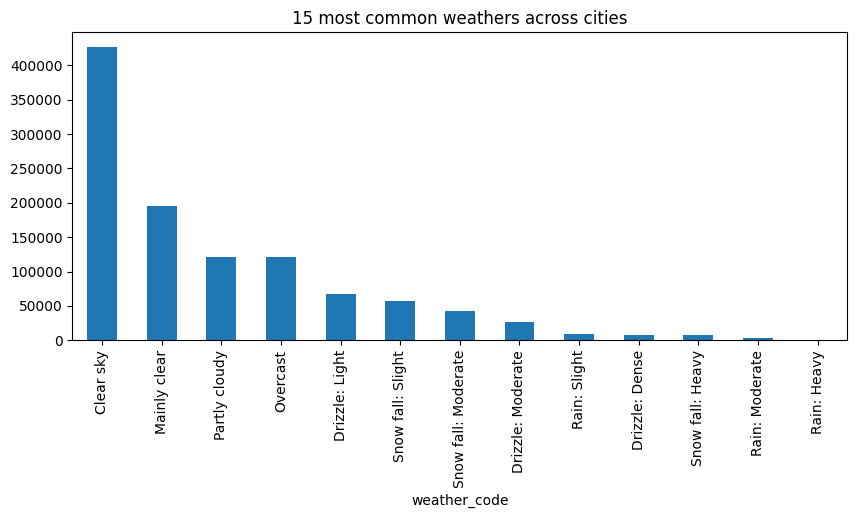

In [19]:
plt.figure(figsize=(10,4))
df['weather_code'].value_counts().head(15).plot(kind='bar')

plt.title('15 most common weathers across cities')
plt.show()

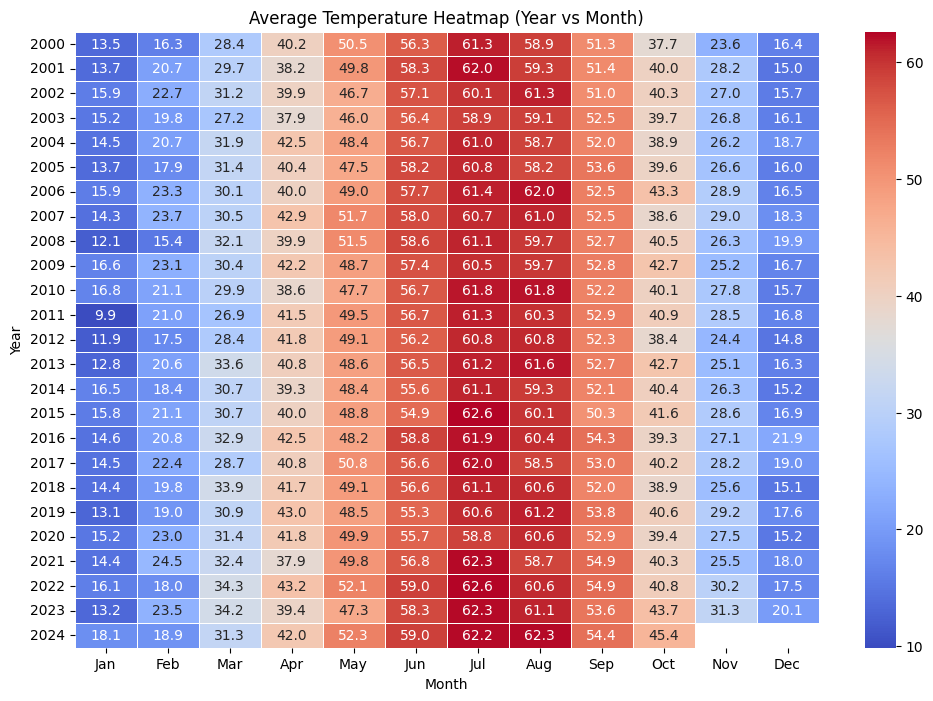

In [20]:
# Create a pivot table without creating separate columns
temp_pivot = df.pivot_table(values='temp_2m',
                            index=df['time'].dt.year,
                            columns=df['time'].dt.month,
                            aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(temp_pivot, cmap='coolwarm', annot=True, fmt=".1f", linewidths=0.5)
plt.title('Average Temperature Heatmap (Year vs Month)')
plt.xlabel('Month')
plt.xticks(ticks=np.arange(12) + 0.5, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                              'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.ylabel('Year')
plt.show()



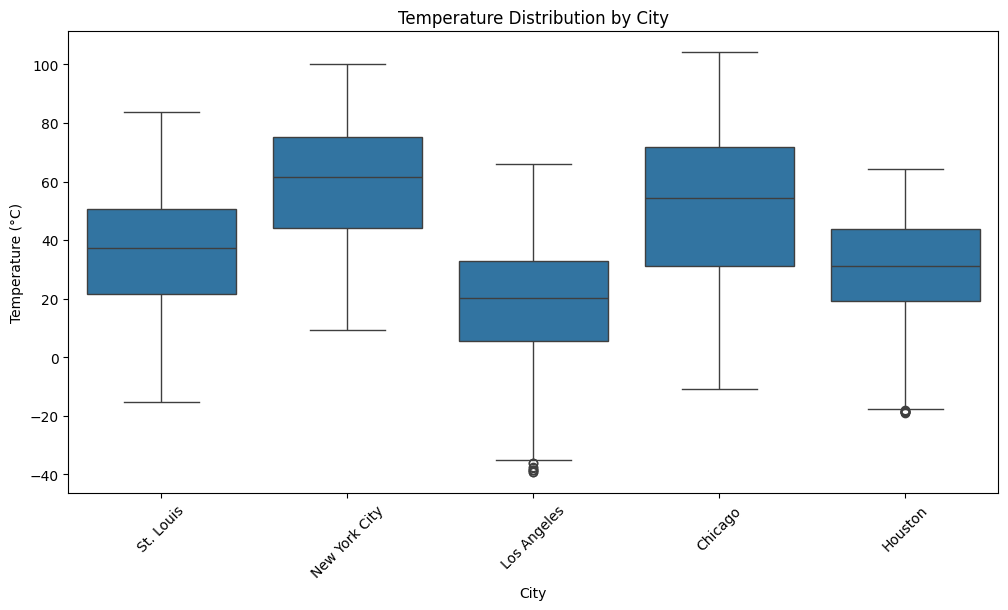

In [21]:
# Temperature Distribution by City
plt.figure(figsize=(12, 6))
sns.boxplot(x='location_city', y='temp_2m', data=df)
plt.title('Temperature Distribution by City')
plt.xlabel('City')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.show()


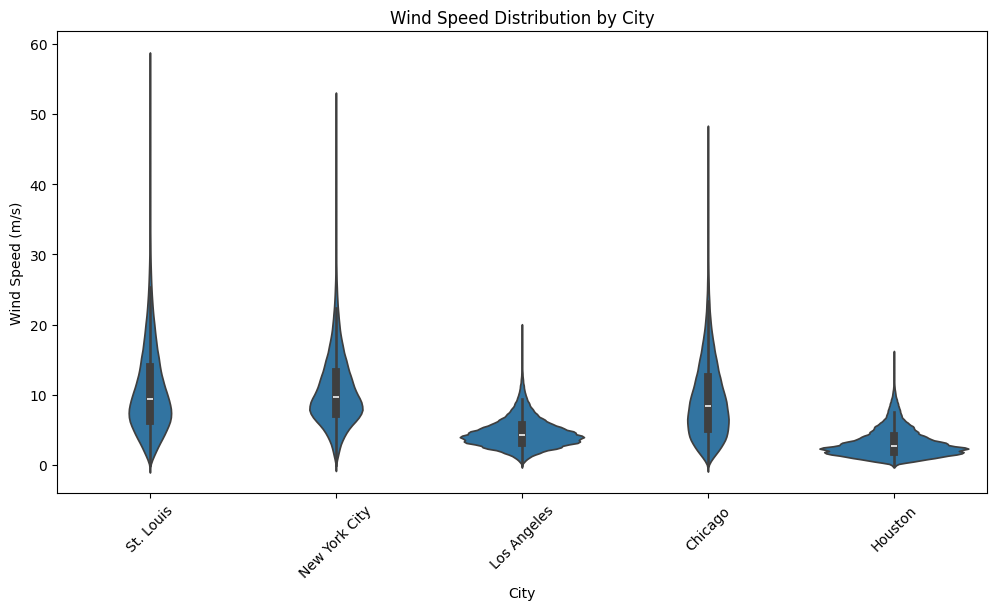

In [22]:
# Wind Speed Distribution by City
plt.figure(figsize=(12, 6))
sns.violinplot(x='location_city', y='wind_speed_10m', data=df)
plt.title('Wind Speed Distribution by City')
plt.xlabel('City')
plt.ylabel('Wind Speed (m/s)')
plt.xticks(rotation=45)
plt.show()


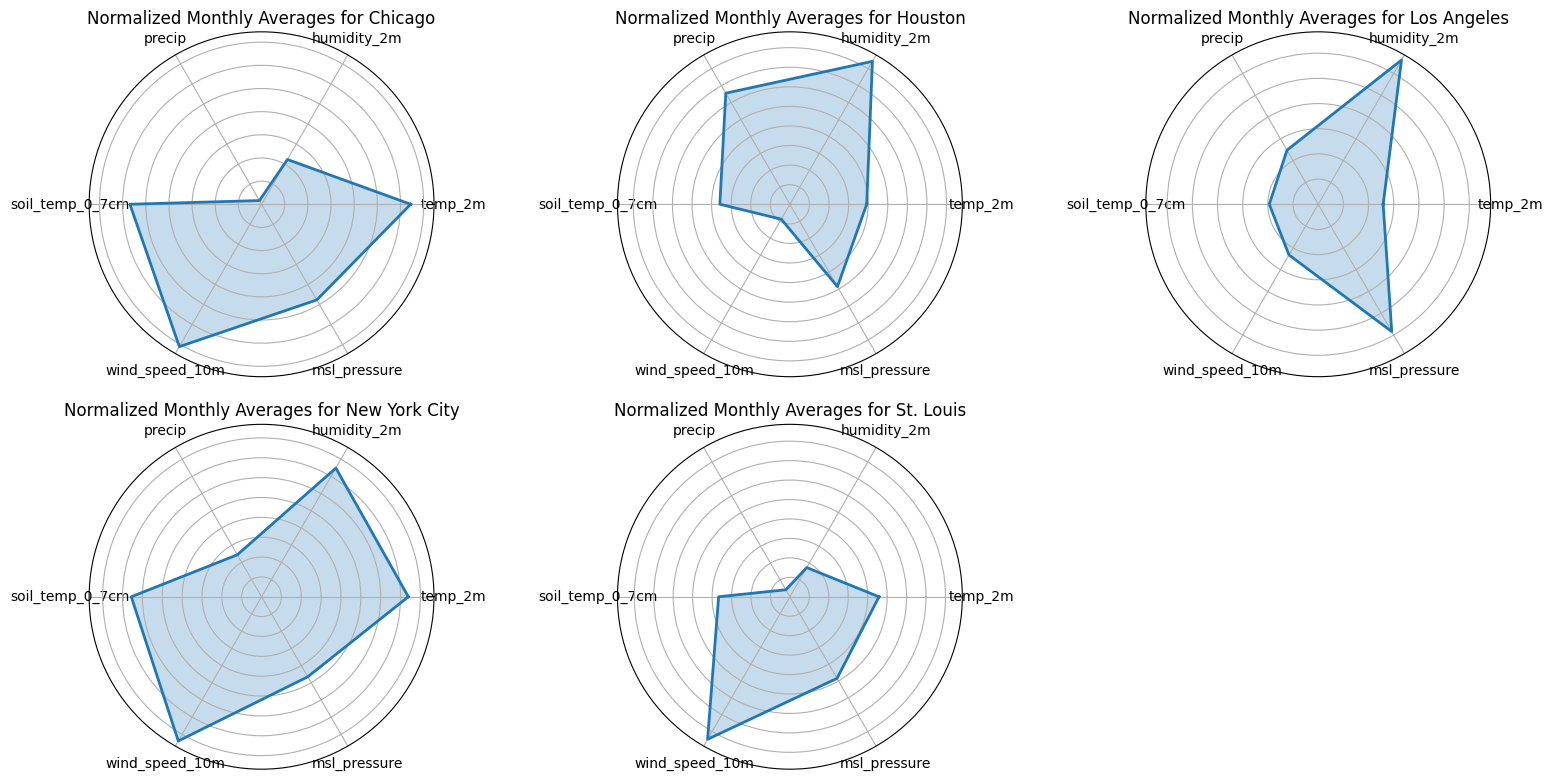

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Select only the specified numeric columns
selected_features = ['temp_2m', 'humidity_2m', 'precip', 'soil_temp_0_7cm', 'wind_speed_10m', 'msl_pressure']

# Calculate monthly averages for all cities
monthly_data = df.groupby(['location_city', df['time'].dt.month])[selected_features].mean().reset_index()

# Normalize the data across all cities
scaler = MinMaxScaler()
normalized_values = scaler.fit_transform(monthly_data[selected_features])

# Add normalized values back to the DataFrame
monthly_data[selected_features] = normalized_values

# Set up the grid for radar charts
cities = monthly_data['location_city'].unique()
num_cities = len(cities)
num_cols = 3
num_rows = 2  # Calculate number of rows needed

fig, axs = plt.subplots(num_rows, num_cols, figsize=(16, 4 * num_rows), subplot_kw=dict(polar=True))

# Flatten the axes array for easier indexing
axs = axs.flatten()

# Loop through each city to create radar charts
for i, city in enumerate(cities):
    city_data = monthly_data[monthly_data['location_city'] == city]

    # Prepare data for radar chart
    labels = selected_features
    values = city_data[selected_features].mean(axis=0).values  # Use mean across all months for each feature

    # Create angles for the radar chart
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()

    # Complete the loop for the radar chart
    values = np.concatenate((values, [values[0]]))  # Closing the loop
    angles += angles[:1]  # Closing the loop for angles

    # Plot radar chart
    axs[i].fill(angles, values, alpha=0.25)
    axs[i].plot(angles, values, linewidth=2)

    axs[i].set_yticklabels([])
    axs[i].set_xticks(angles[:-1])  # Remove the last tick
    axs[i].set_xticklabels(labels)
    axs[i].set_title(f'Normalized Monthly Averages for {city}')

for j in range(num_cities, len(axs)):
    axs[j].set_visible(False)
# Adjust layout
plt.tight_layout()
plt.show()


In [209]:
'''
# Pairplot for temperature and other features by city
sns.pairplot(df, vars=['temp_2m', 'humidity_2m', 'dew_point_2m', 'precip'],
             hue='location_city', palette='viridis')
plt.suptitle('Pairplot of Weather Features by City', y=1.02)
plt.show()
'''




"\n# Pairplot for temperature and other features by city\nsns.pairplot(df, vars=['temp_2m', 'humidity_2m', 'dew_point_2m', 'precip'], \n             hue='location_city', palette='viridis')\nplt.suptitle('Pairplot of Weather Features by City', y=1.02)\nplt.show()\n"

# **Univariate plot**

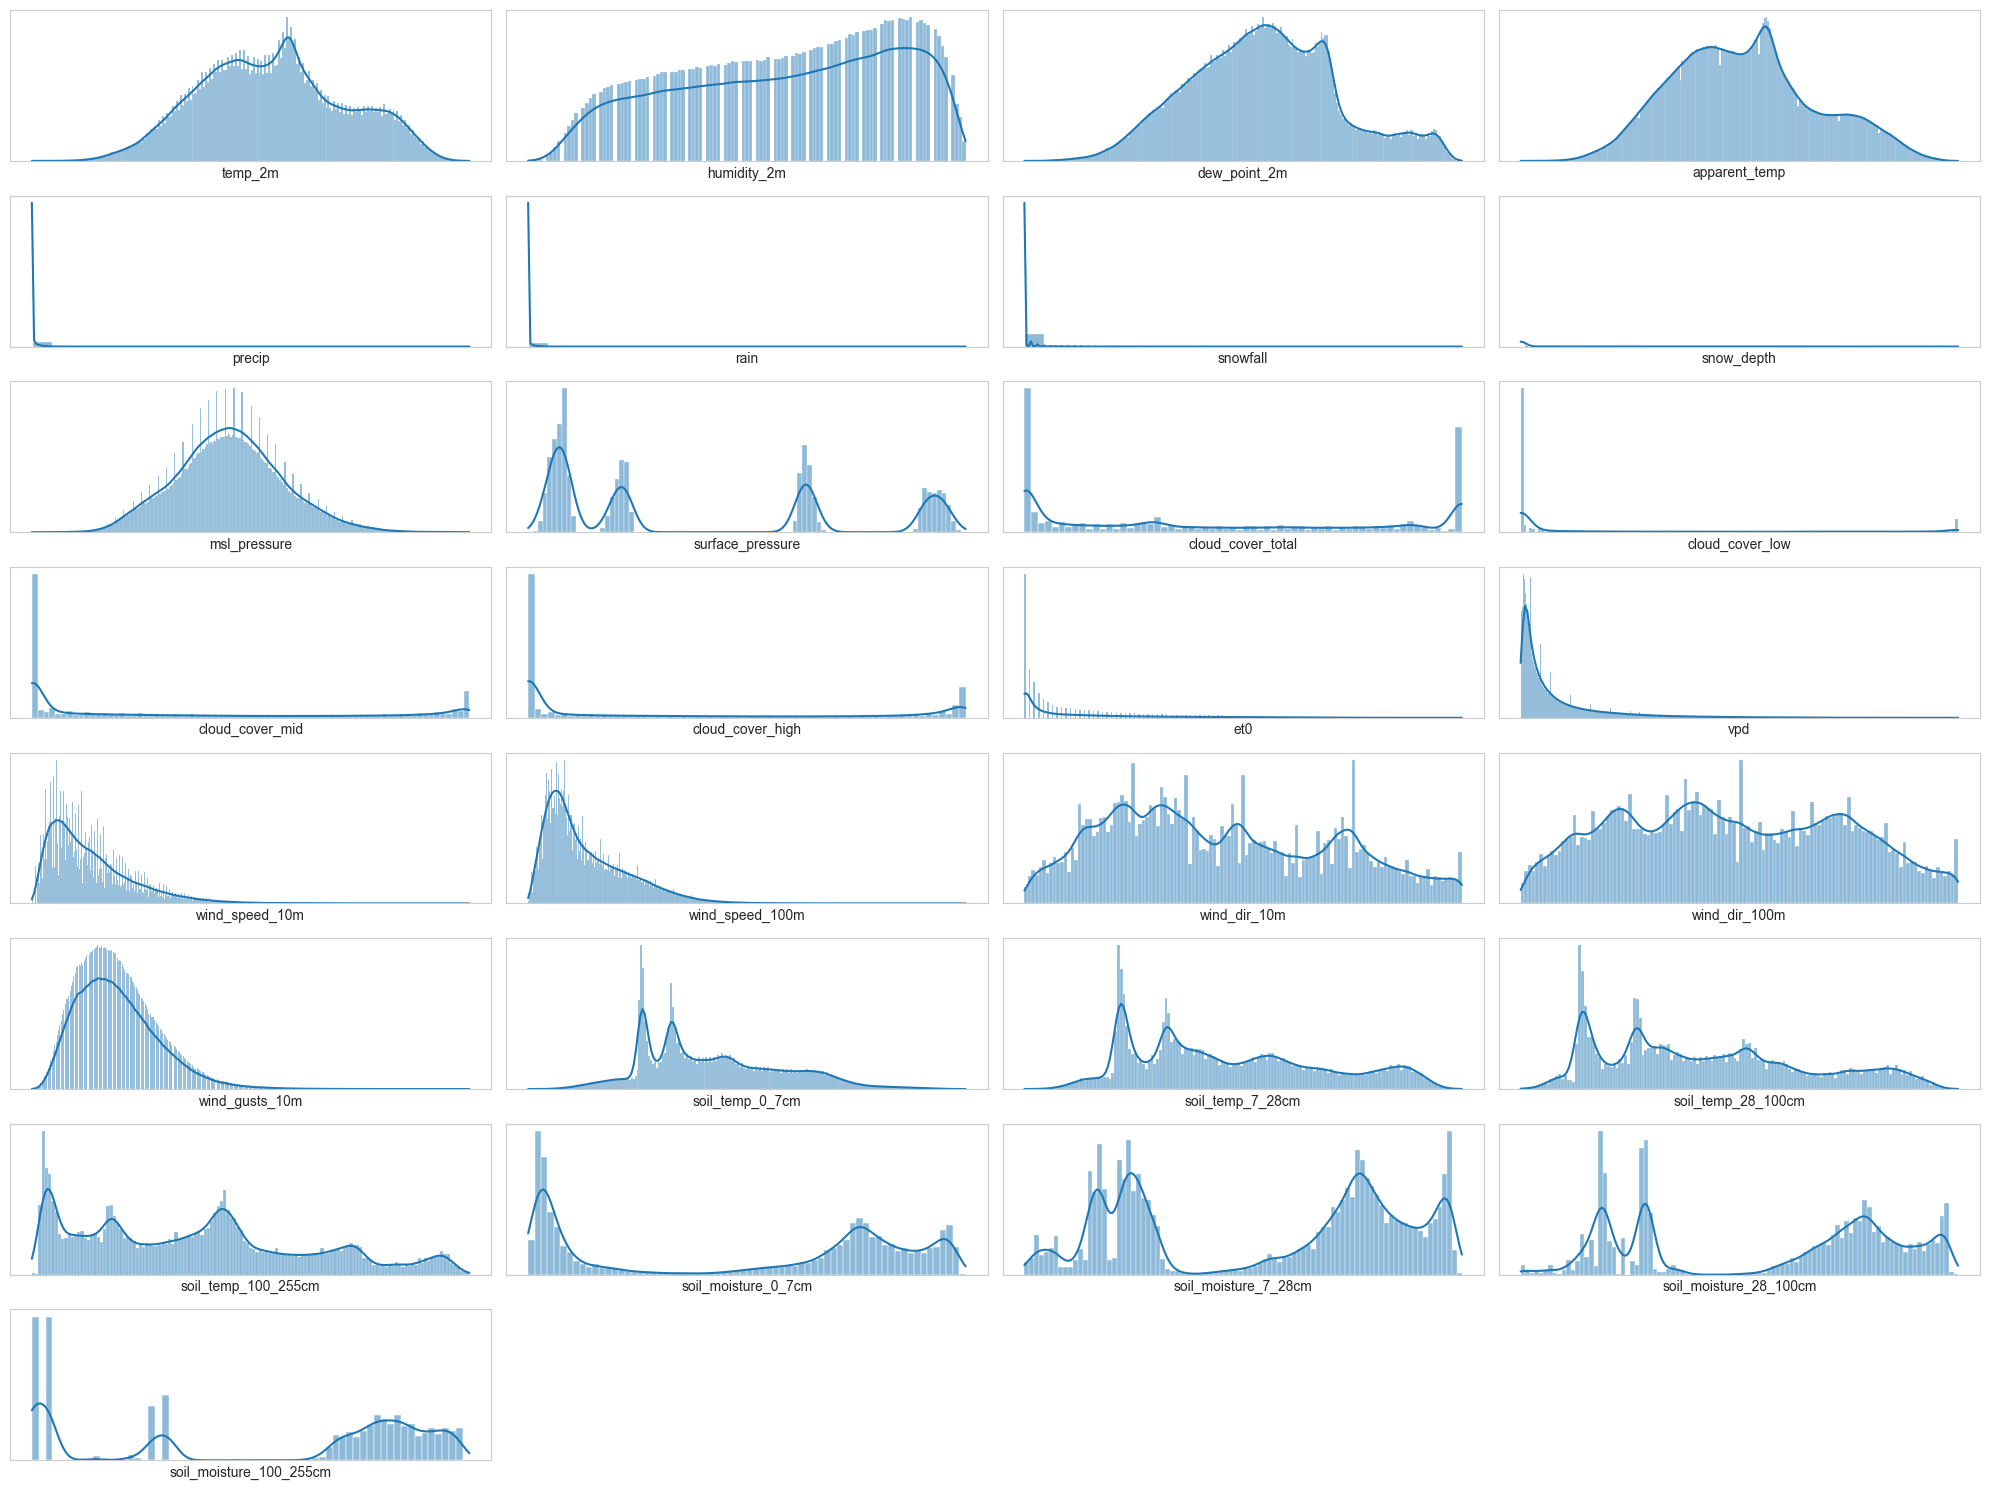

In [24]:


color = sns.color_palette("viridis")
sns.set_style("whitegrid", {'axes.grid' : False})
fig, ax1 = plt.subplots(8,4,  figsize=(20, 15))
k = 0
# Select numeric columns only
columns = df.select_dtypes(include=['number']).columns

for i in range(8):
    for j in range(4):
        if k < len(columns):

            ax=sns.histplot(x=df[columns[k]],ax=ax1[i][j],kde=True)
            ax.set_ylabel(None); ax.set_yticks([])
            ax.set_xticks([])

            k += 1

        else:
            ax1[i][j].set_visible(False)

plt.tight_layout()
plt.show()


# **Skewness - Feature Transformation**

In [25]:
def log_transform(col):
    return np.log(col[0])

df['vpd'] = df[['vpd']].apply(log_transform, axis=1)


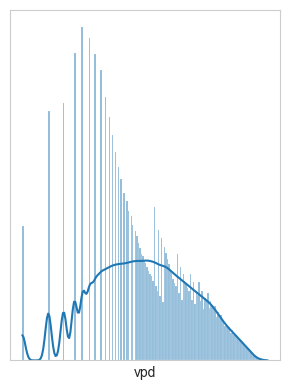

In [26]:
color = sns.color_palette("viridis")
sns.set_style("whitegrid", {'axes.grid' : False})
fig, axs = plt.subplots(1, 1, figsize=(3, 4), sharex=True)




sns.histplot(x=df['vpd'], kde=True)
axs.set_ylabel(None); axs.set_yticks([])
axs.set_xticks([])



plt.tight_layout()
plt.show()

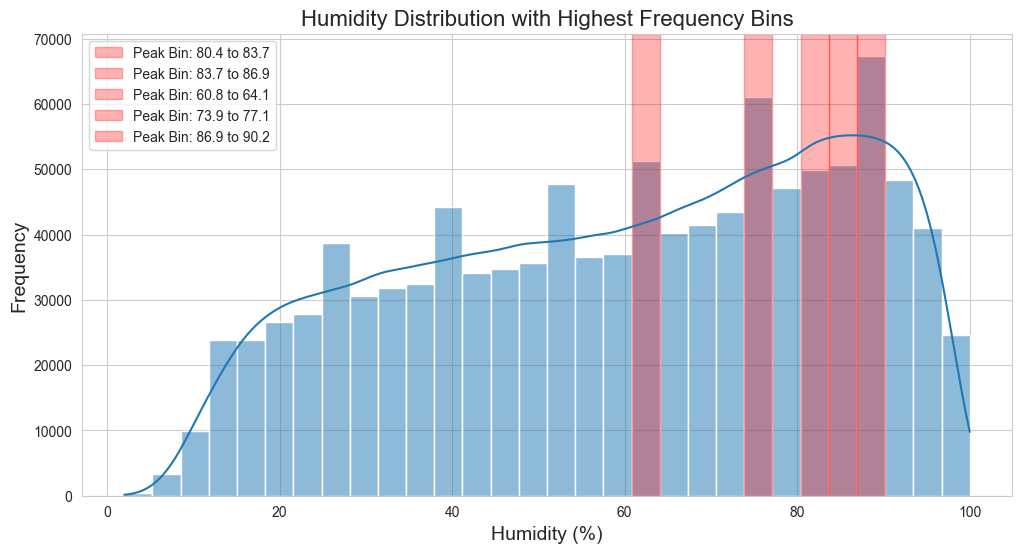

Top 5 Bins with Highest Frequency:
Bin: 80.4 to 83.7 - Count: 49832
Bin: 83.7 to 86.9 - Count: 50722
Bin: 60.8 to 64.1 - Count: 51225
Bin: 73.9 to 77.1 - Count: 61036
Bin: 86.9 to 90.2 - Count: 67394


In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



# Calculate histogram
counts, bin_edges = np.histogram(df['humidity_2m'], bins=30)

# Get the indices of the top 5 bins with the highest frequency
top_5_bin_indices = np.argsort(counts)[-5:]  # Get indices of the top 5 counts

# Extract the top 5 bins
top_5_bins = [(bin_edges[i], bin_edges[i + 1]) for i in top_5_bin_indices]

# Plot the distribution with peaks highlighted
plt.figure(figsize=(12, 6))
sns.histplot(df['humidity_2m'], bins=30, kde=True)
plt.title('Humidity Distribution with Highest Frequency Bins', fontsize=16)
plt.xlabel('Humidity (%)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid()

# Highlighting the top 5 bins
for bin_range in top_5_bins:
    plt.axvspan(bin_range[0], bin_range[1], color='red', alpha=0.3, label=f'Peak Bin: {bin_range[0]:.1f} to {bin_range[1]:.1f}')

# Show the legend
plt.legend()
plt.show()

# Print the top 5 bins with highest frequency
print("Top 5 Bins with Highest Frequency:")
for bin_range in top_5_bins:
    print(f'Bin: {bin_range[0]:.1f} to {bin_range[1]:.1f} - Count: {counts[np.where(bin_edges[:-1] == bin_range[0])[0][0]]}')


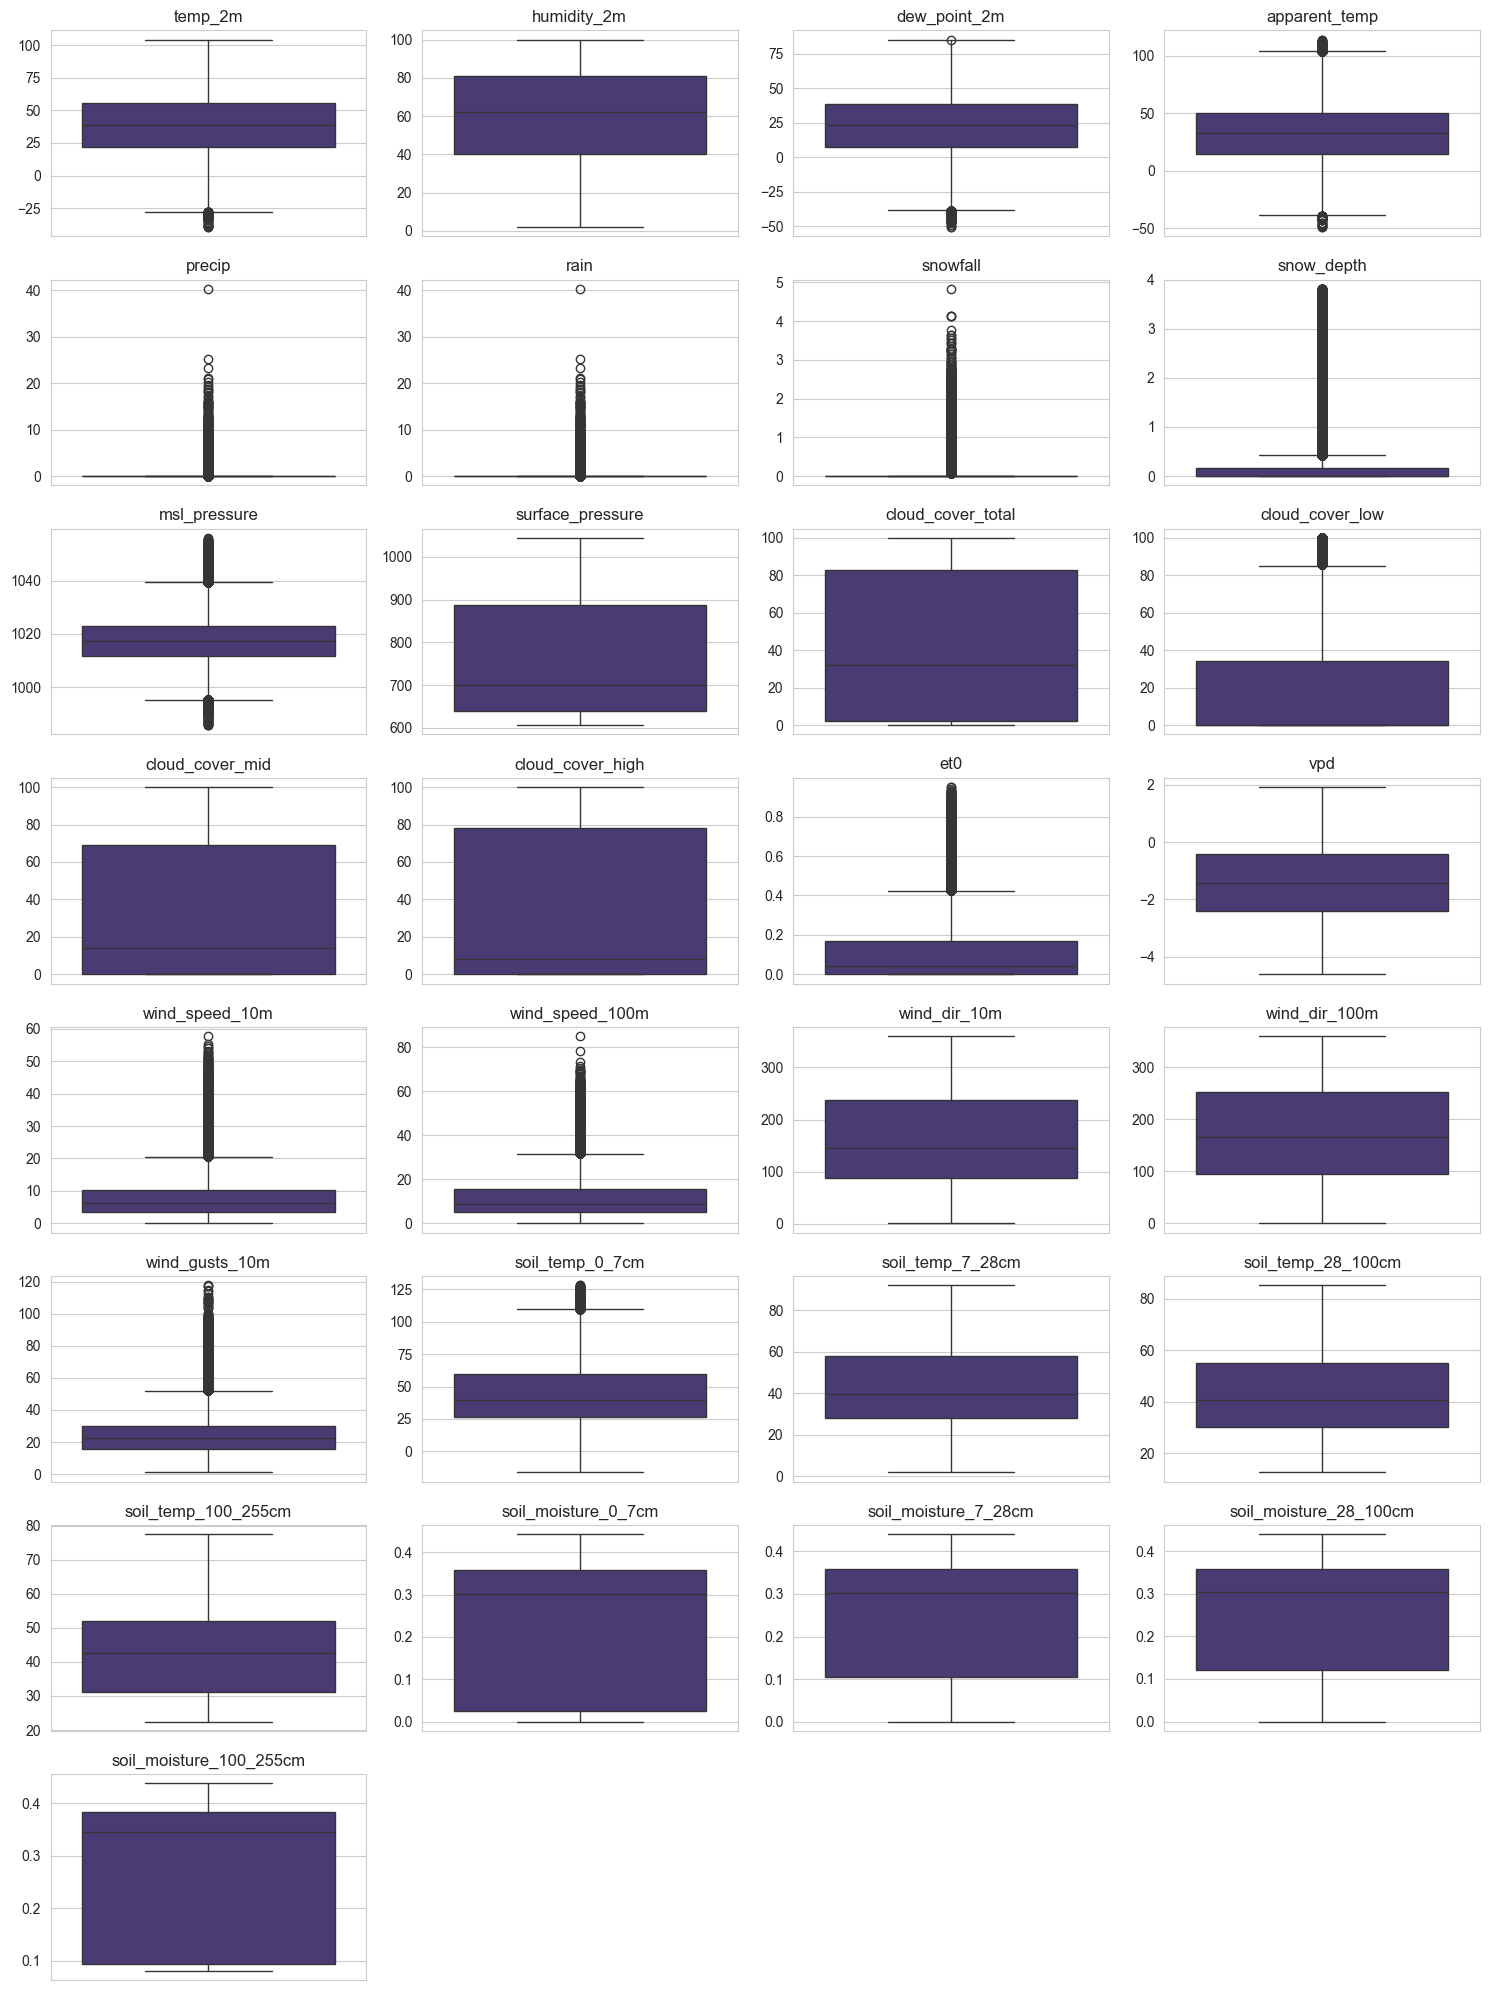

In [28]:
# Select numeric columns only
columns = df.select_dtypes(include=['number']).columns


color = sns.color_palette("viridis")
sns.set_style("whitegrid")

fig, ax1 = plt.subplots(8, 4, figsize=(15, 20))
k = 0

for i in range(8):
    for j in range(4):
        if k < len(columns):
            sns.boxplot(y=df[columns[k]], ax=ax1[i][j], palette=color)
            ax1[i][j].set_title(columns[k])
            ax1[i][j].set_ylabel(None)
            ax1[i][j].set_xlabel(None)
            k += 1
        else:
            ax1[i][j].set_visible(False)

plt.tight_layout()
plt.show()


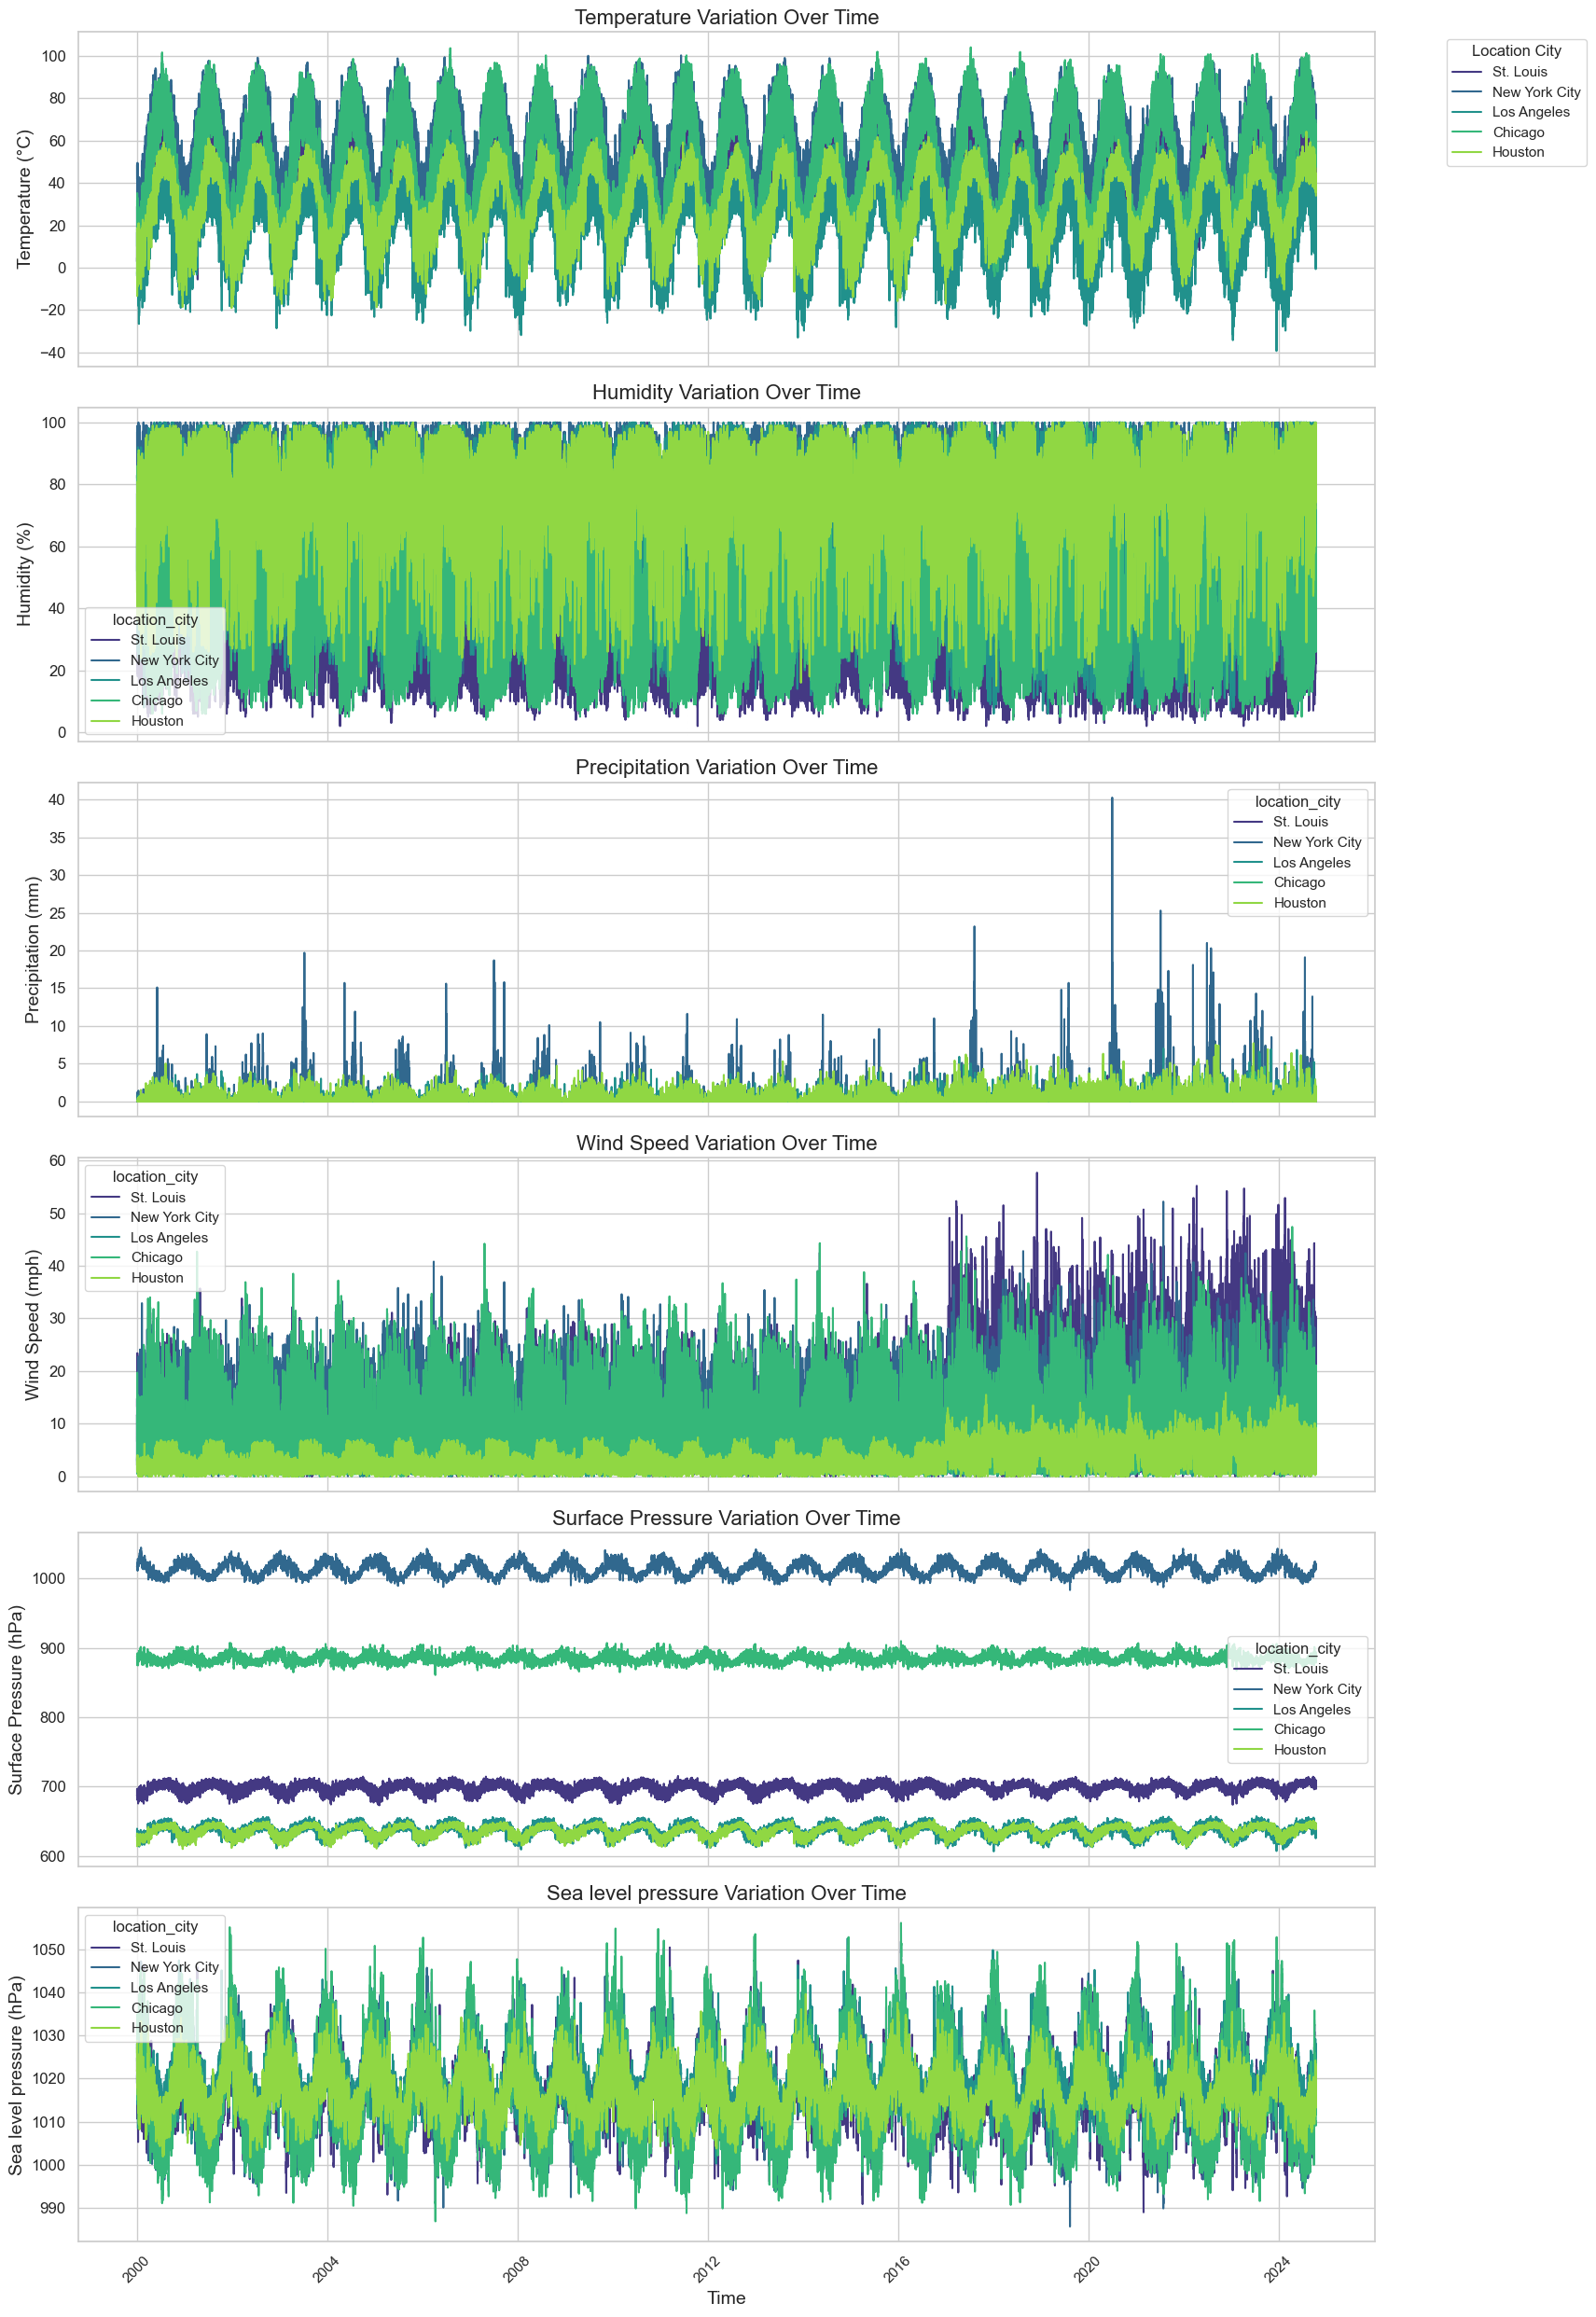

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style='whitegrid')

# Create a figure with subplots
fig, axs = plt.subplots(6, 1, figsize=(15, 25), sharex=True)  # Adjusted size for clarity

# Plot Temperature
sns.lineplot(data=df, x='time', y='temp_2m', hue='location_city', ax=axs[0], palette='viridis')
axs[0].set_title('Temperature Variation Over Time', fontsize=16)
axs[0].set_ylabel('Temperature (°C)', fontsize=14)
axs[0].tick_params(axis='y', which='both', labelsize=12)  # Increase y-tick label size

# Plot Humidity
sns.lineplot(data=df, x='time', y='humidity_2m', hue='location_city', ax=axs[1], palette='viridis')
axs[1].set_title('Humidity Variation Over Time', fontsize=16)
axs[1].set_ylabel('Humidity (%)', fontsize=14)
axs[1].tick_params(axis='y', which='both', labelsize=12)  # Increase y-tick label size

# Plot Precipitation
sns.lineplot(data=df, x='time', y='precip', hue='location_city', ax=axs[2], palette='viridis')
axs[2].set_title('Precipitation Variation Over Time', fontsize=16)
axs[2].set_ylabel('Precipitation (mm)', fontsize=14)
axs[2].tick_params(axis='y', which='both', labelsize=12)  # Increase y-tick label size

# Plot Wind Speed
sns.lineplot(data=df, x='time', y='wind_speed_10m', hue='location_city', ax=axs[3], palette='viridis')
axs[3].set_title('Wind Speed Variation Over Time', fontsize=16)
axs[3].set_ylabel('Wind Speed (mph)', fontsize=14)
axs[3].tick_params(axis='y', which='both', labelsize=12)  # Increase y-tick label size

# Plot Surface Pressure
sns.lineplot(data=df, x='time', y='surface_pressure', hue='location_city', ax=axs[4], palette='viridis')
axs[4].set_title('Surface Pressure Variation Over Time', fontsize=16)
axs[4].set_ylabel('Surface Pressure (hPa)', fontsize=14)
axs[4].tick_params(axis='y', which='both', labelsize=12)  # Increase y-tick label size

# Plot Surface Pressure
sns.lineplot(data=df, x='time', y='msl_pressure', hue='location_city', ax=axs[5], palette='viridis')
axs[5].set_title('Sea level pressure Variation Over Time', fontsize=16)
axs[5].set_ylabel('Sea level pressure (hPa)', fontsize=14)
axs[5].tick_params(axis='y', which='both', labelsize=12)  # Increase y-tick label size
# Set x-axis label
axs[5].set_xlabel('Time', fontsize=14)

# Show the plots
plt.xticks(rotation=45)
plt.tight_layout()

# Move the legend outside to avoid clutter
axs[0].legend(title='Location City', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


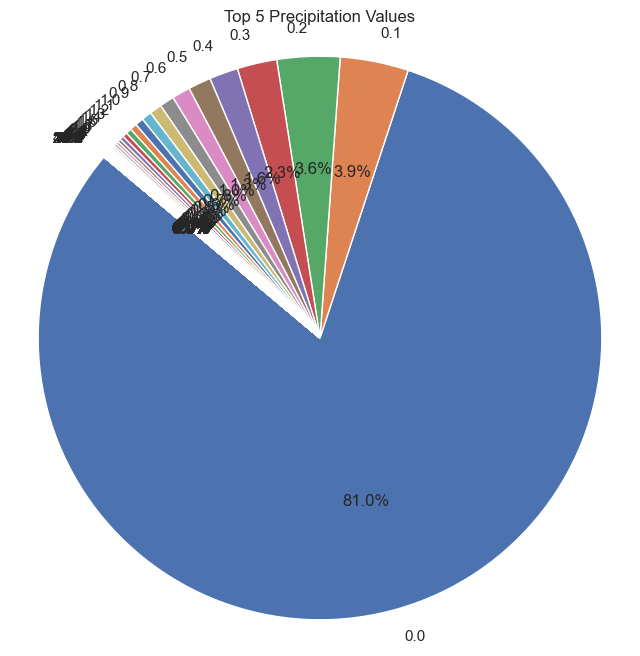

In [30]:

precip_counts = df['precip'].value_counts()[:]

plt.figure(figsize=(8, 8))
plt.pie(precip_counts, labels=precip_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Precipitation Values')
plt.axis('equal')

plt.show()

# Univariate Outlier removal using domain:

In [31]:
df.loc[(df['wind_speed_10m'] > 40)]

time  temp_2m  humidity_2m  dew_point_2m  apparent_temp  \
125791 2014-05-08 07:00:00     49.1           27          16.8           33.8   
125792 2014-05-08 08:00:00     50.7           21          12.0           34.9   
149694 2017-01-28 06:00:00     29.3           32           2.9           10.0   
150197 2017-02-18 05:00:00     44.1           22           7.7           27.6   
150198 2017-02-18 06:00:00     45.5           20           7.2           28.0   
...                    ...      ...          ...           ...            ...   
804492 2017-06-07 12:00:00     70.0           48          49.6           59.1   
830556 2020-05-28 12:00:00     73.5           10          13.1           56.5   
864512 2024-04-12 08:00:00     75.0           12          19.2           60.6   
864513 2024-04-12 09:00:00     74.4           13          20.9           58.4   
864514 2024-04-12 10:00:00     73.1           15          22.2           55.5   

        precip  rain  snowfall  snow_depth       weather_code  ...  \
125791     0.4   0.3      0.07         0.0  Snow fall: Slight  ...   
125792     0.2   0.2      0.00         0.0     Drizzle: Light  ...   
149694     0.0   0.0      0.00         0.0       Mainly clear  ...   
150197     0.0   0.0      0.00         0.0       Mainly clear  ...   
150198     0.0   0.0      0.00         0.0           Overcast  ...   
...        ...   ...       ...         ...                ...  ...   
804492     0.0   0.0      0.00         0.0           Overcast  ...   
830556     0.0   0.0      0.00         0.0       Mainly clear  ...   
864512     0.0   0.0      0.00         0.0          Clear sky  ...   
864513     0.0   0.0      0.00         0.0          Clear sky  ...   
864514     0.0   0.0      0.00         0.0       Mainly clear  ...   

        wind_gusts_10m  soil_temp_0_7cm  soil_temp_7_28cm  soil_temp_28_100cm  \
125791            83.2             65.4              47.6                39.1   
125792            93.2             65.8              48.0                39.2   
149694            77.4             27.0              20.7                22.6   
150197            63.7             34.2              27.3                27.0   
150198            69.1             39.1              27.6                27.0   
...                ...              ...               ...                 ...   
804492            72.4             85.0              70.5                58.4   
830556            69.5             89.1              73.0                60.6   
864512            65.2             85.2              56.8                47.3   
864513            72.0             85.0              57.2                47.3   
864514            78.8             83.6              57.5                47.3   

        soil_temp_100_255cm  soil_moisture_0_7cm  soil_moisture_7_28cm  \
125791                 29.7                0.014                 0.116   
125792                 29.7                0.014                 0.116   
149694                 34.3                0.030                 0.080   
150197                 31.9                0.032                 0.066   
150198                 31.9                0.031                 0.066   
...                     ...                  ...                   ...   
804492                 51.0                0.025                 0.020   
830556                 51.0                0.008                 0.015   
864512                 43.3                0.010                 0.059   
864513                 43.3                0.010                 0.059   
864514                 43.3                0.010                 0.059   

        soil_moisture_28_100cm  soil_moisture_100_255cm  location_city  
125791                   0.087                    0.081      St. Louis  
125792                   0.087                    0.081      St. Louis  
149694                   0.064                    0.192      St. Louis  
150197                   0.062                    0.19

In [32]:
df = df[df['wind_speed_10m'] <= 40]

In [33]:
df.loc[(df['precip'] > 40)]

time  temp_2m  humidity_2m  dew_point_2m  apparent_temp  \
396897 2020-06-30 09:00:00     73.4           91          70.7           76.7   

        precip  rain  snowfall  snow_depth weather_code  ...  wind_gusts_10m  \
396897    40.3  40.3       0.0         0.0  Rain: Heavy  ...            37.8   

        soil_temp_0_7cm  soil_temp_7_28cm  soil_temp_28_100cm  \
396897             75.1              74.9                72.0   

        soil_temp_100_255cm  soil_moisture_0_7cm  soil_moisture_7_28cm  \
396897                 63.8                0.439                 0.439   

        soil_moisture_28_100cm  soil_moisture_100_255cm  location_city  
396897                   0.422                    0.384  New York City  

[1 rows x 32 columns]

In [34]:
df = df[df['precip'] <= 40]

# Feature selection

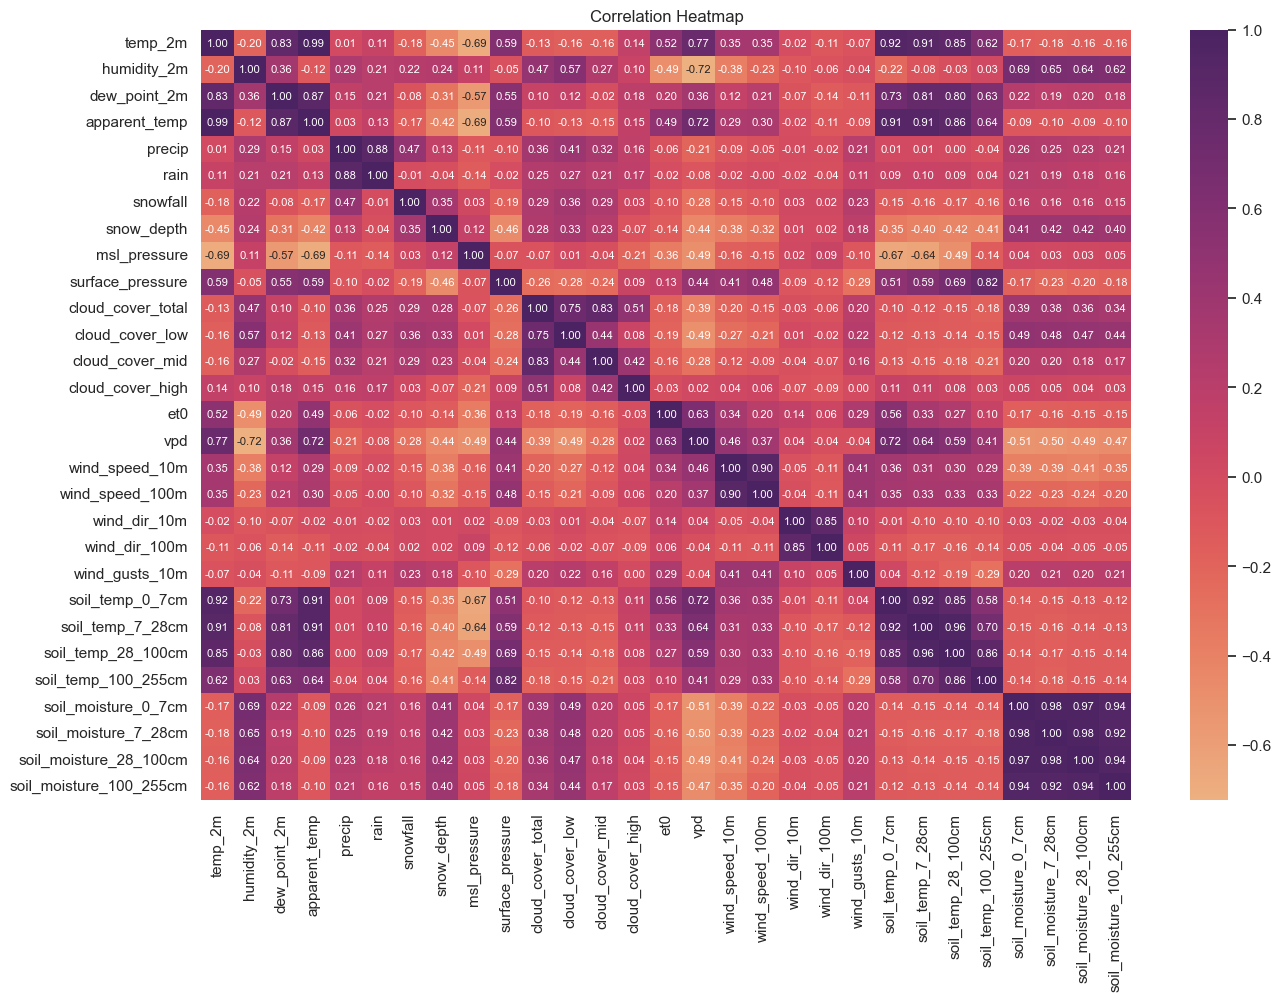

In [35]:
df_numeric = df.select_dtypes(include=[np.number])

sns.set(font_scale = 1)
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='flare', fmt=".2f",annot_kws={"size": 8})
plt.title('Correlation Heatmap')
plt.show()

From the correlation map the following fetaure among themselves shows high correlation


* Precipation, rain

* Wind_Speed 10m,100m and gust

* win direction 10m, 100m

* Due_point and apparent_temp(2m)

* Soil temperature at various depths

* Soil moisture ata various depth

* cloud_over total with mid,low and high

#Wind Analysis

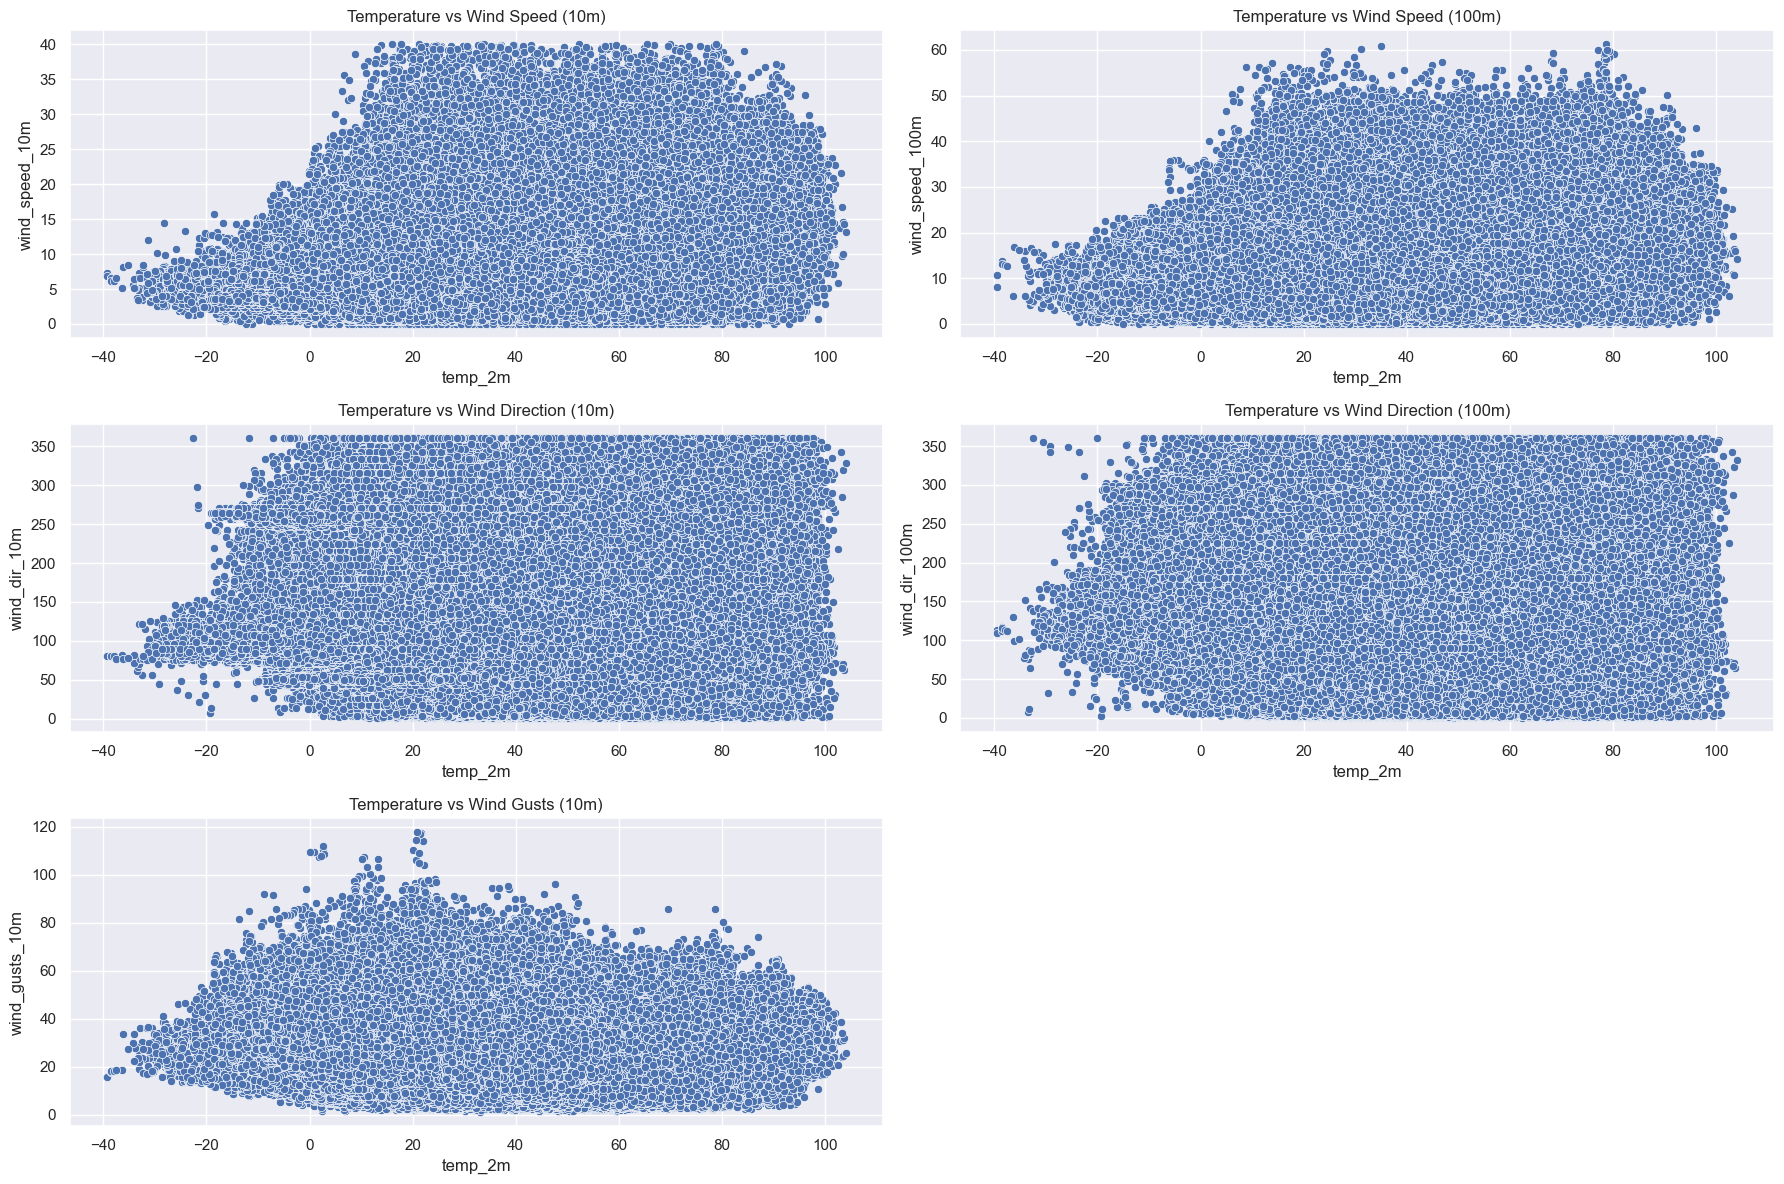

In [36]:
plt.figure(figsize=(18, 12))

# Temperature vs Wind Speed at 10m
plt.subplot(3, 2, 1)
sns.scatterplot(x='temp_2m', y='wind_speed_10m', data=df)
plt.title('Temperature vs Wind Speed (10m)')

# Temperature vs Wind Speed at 100m
plt.subplot(3, 2, 2)
sns.scatterplot(x='temp_2m', y='wind_speed_100m', data=df)
plt.title('Temperature vs Wind Speed (100m)')

# Temperature vs Wind Direction at 10m
plt.subplot(3, 2, 3)
sns.scatterplot(x='temp_2m', y='wind_dir_10m', data=df)
plt.title('Temperature vs Wind Direction (10m)')

# Temperature vs Wind Direction at 100m
plt.subplot(3, 2, 4)
sns.scatterplot(x='temp_2m', y='wind_dir_100m', data=df)
plt.title('Temperature vs Wind Direction (100m)')

# Temperature vs Wind Gusts at 10m
plt.subplot(3, 2, 5)
sns.scatterplot(x='temp_2m', y='wind_gusts_10m', data=df)
plt.title('Temperature vs Wind Gusts (10m)')

plt.tight_layout()
plt.show()

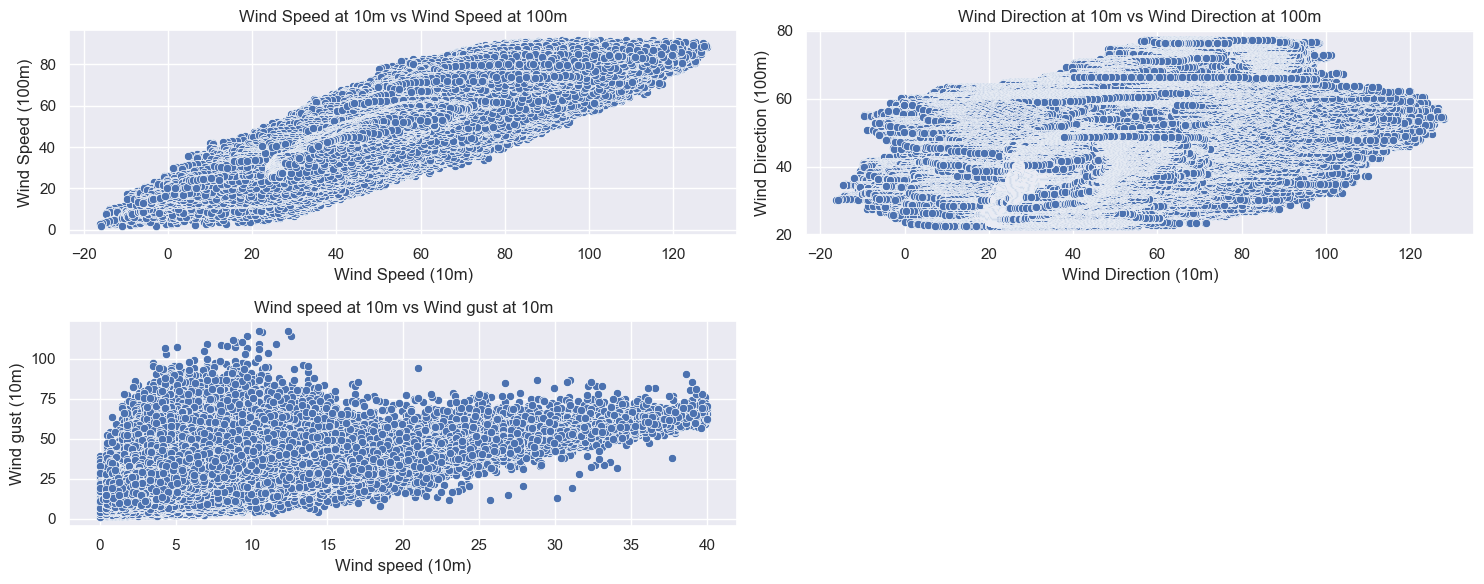

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure with two subplots
plt.figure(figsize=(15, 6))

# Scatter plot for Wind Speed at 10m vs Wind Speed at 100m
plt.subplot(2, 2, 1)
sns.scatterplot(x='soil_temp_0_7cm', y='soil_temp_7_28cm', data=df)
plt.title('Wind Speed at 10m vs Wind Speed at 100m')
plt.xlabel('Wind Speed (10m)')
plt.ylabel('Wind Speed (100m)')
plt.grid(True)

# Scatter plot for Wind Direction at 10m vs Wind Direction at 100m
plt.subplot(2, 2, 2)
sns.scatterplot(x='soil_temp_0_7cm', y='soil_temp_100_255cm', data=df)
plt.title('Wind Direction at 10m vs Wind Direction at 100m')
plt.xlabel('Wind Direction (10m)')
plt.ylabel('Wind Direction (100m)')


plt.subplot(2, 2, 3)
sns.scatterplot(x='wind_speed_10m', y='wind_gusts_10m', data=df)
plt.title('Wind speed at 10m vs Wind gust at 10m')
plt.xlabel('Wind speed (10m)')
plt.ylabel('Wind gust (10m)')
plt.grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()



#Wind Speed Analysis:

There is a relationship between wind_speed_10m and wind_speed_100m.
Therefore, we will keep only one variable, removing wind_speed_100m.
Wind Direction Analysis:

The scatter plot shows that there is a high correlation between win_dir 100 and 10m..so will keep only one

The relationship between wind_speed_10m and wind_gusts_10m is not linear at lower wind speeds.Despite that there is a correlation as per scatter plot

# Soil analysis

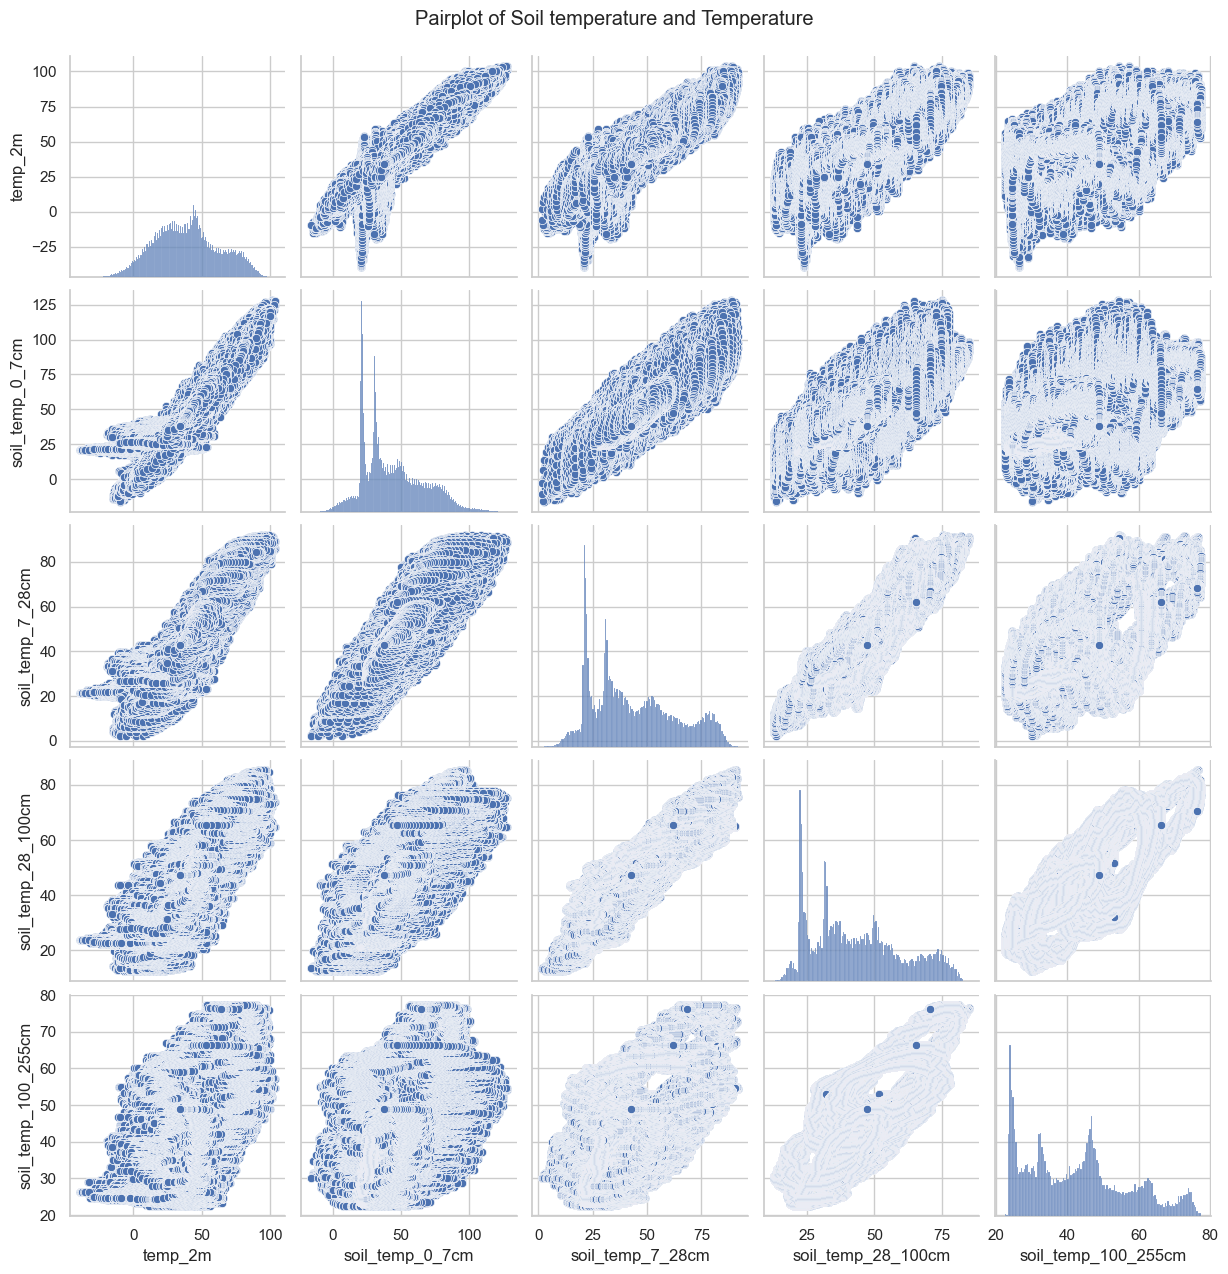

In [38]:
# Combine the lists of moisture and temperature columns
features_to_plot = moisture_columns = ["temp_2m",
    'soil_temp_0_7cm',
    'soil_temp_7_28cm',
    'soil_temp_28_100cm',
    'soil_temp_100_255cm'
]
# Create the pairplot
sns.set(style="whitegrid")
pairplot = sns.pairplot(df[features_to_plot])
plt.suptitle('Pairplot of Soil temperature and Temperature', y=1.02)
plt.show()

Accounting to fact that there is some coorelation exist between temp at each  depth..Im taking only 0-7m ..correspodning to highest correlation factor with temperature

# Moisture analysis

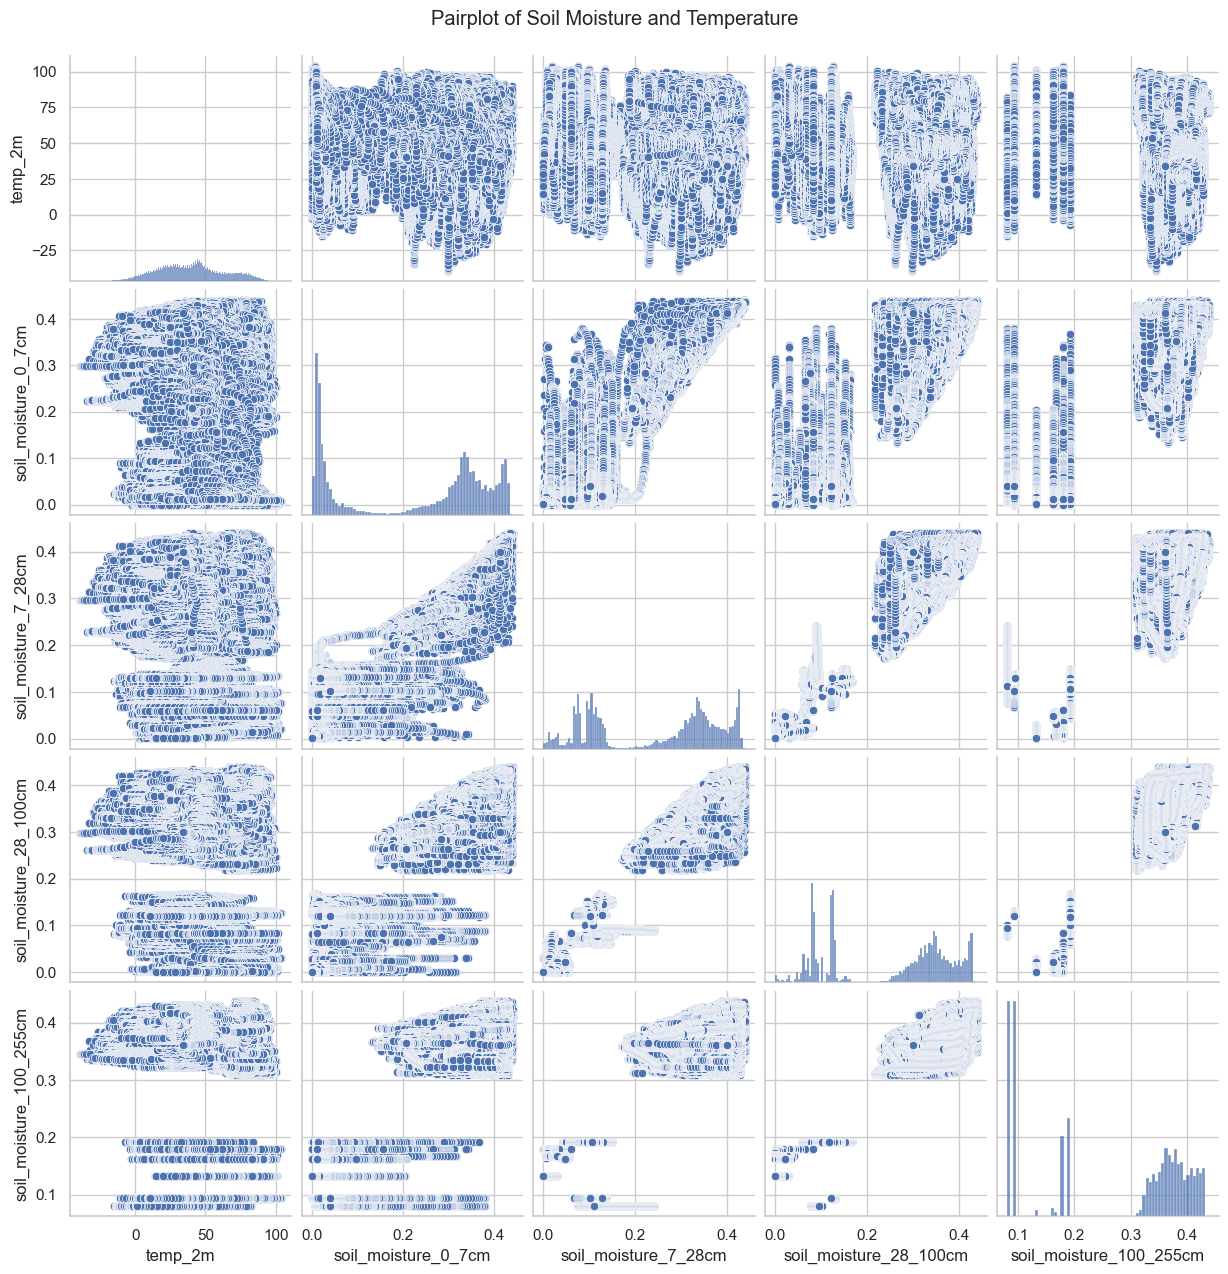

In [39]:
# Combine the lists of moisture and temperature columns
features_to_plot = moisture_columns = ["temp_2m",
    'soil_moisture_0_7cm',
    'soil_moisture_7_28cm',
    'soil_moisture_28_100cm',
    'soil_moisture_100_255cm'
]

# Create the pairplot
sns.set(style="whitegrid")
pairplot = sns.pairplot(df[features_to_plot])
plt.suptitle('Pairplot of Soil Moisture and Temperature', y=1.02)
plt.show()

# Removing features

In [41]:
df.drop([ 'soil_moisture_7_28cm',
    'soil_moisture_28_100cm',
    'soil_moisture_100_255cm','soil_temp_7_28cm',
    'soil_temp_28_100cm',
    'soil_temp_100_255cm','wind_gusts_10m','wind_speed_100m','wind_dir_100m','rain','apparent_temp'],axis=1,inplace=True)

In [ ]:
# Outlier removal through MCD and Mahalanobis distance

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2
from sklearn.covariance import MinCovDet

# Mahalanobis distance function (same as you already have)
def calculate_mahalanobis(data, mean, cov_matrix):
    inv_cov_matrix = np.linalg.inv(cov_matrix)
    distances = []
    for i in range(data.shape[0]):
        diff = data[i] - mean
        dist = np.sqrt(np.dot(np.dot(diff, inv_cov_matrix), diff.T))
        distances.append(dist)
    return np.array(distances)

# Detect outliers using Mahalanobis Distance
def detect_outliers_mahalanobis(df, threshold=0.99):
    data = df.values
    mean = np.mean(data, axis=0)
    cov_matrix = np.cov(data, rowvar=False)
    distances = calculate_mahalanobis(data, mean, cov_matrix)

    chi_squared_threshold = chi2.ppf(threshold, df=data.shape[1])

    outliers = np.where(distances > np.sqrt(chi_squared_threshold))

    return outliers[0], distances

# Detect outliers using MCD
def detect_outliers_mcd(df,threshold=0.99):
    data = df.values
    mcd = MinCovDet().fit(data)
    distances = mcd.mahalanobis(data)

    # Calculate the threshold based on chi-squared distribution
    threshold = np.sqrt(chi2.ppf(threshold, df=data.shape[1]))
    outliers = np.where(np.sqrt(distances) > threshold)

    return outliers[0], np.sqrt(distances)

# Select numeric columns
selected_columns = [
    'temp_2m', 'humidity_2m', 'dew_point_2m',
     'msl_pressure', 'surface_pressure', 'soil_moisture_0_7cm'
]


# Select only the specified numeric columns
df_numeric = df[selected_columns].select_dtypes(include=[np.number])



# Mahalanobis outliers
outliers_mahalanobis, mahalanobis_distances = detect_outliers_mahalanobis(df_numeric, threshold=0.99)

# MCD outliers
outliers_mcd, mcd_distances = detect_outliers_mcd(df_numeric, threshold=0.99)

# Add distances and outlier labels to DataFrame for Mahalanobis
df['MahalanobisDistance'] = mahalanobis_distances
df['MahalanobisOutlier'] = False
df.iloc[outliers_mahalanobis, df.columns.get_loc('MahalanobisOutlier')] = True

# Add distances and outlier labels to DataFrame for MCD
df['MCDDistance'] = mcd_distances
df['MCDOutlier'] = False
df.iloc[outliers_mcd, df.columns.get_loc('MCDOutlier')] = True






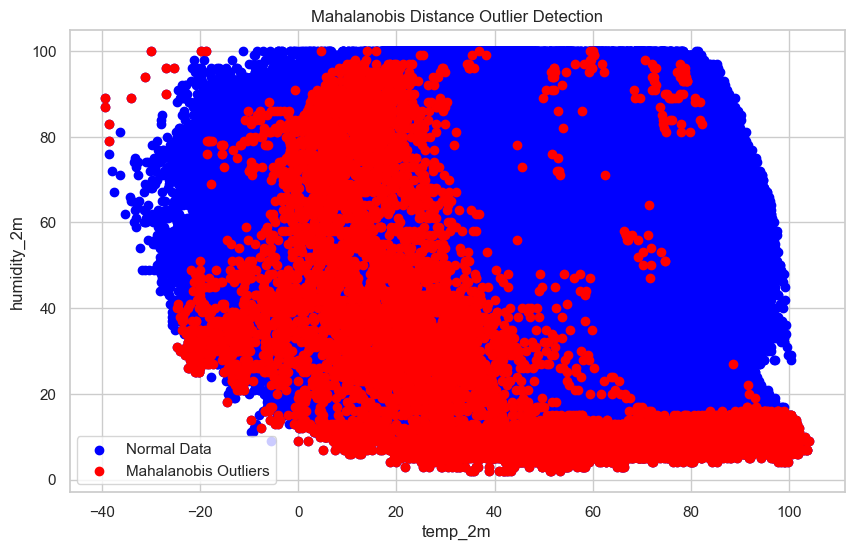

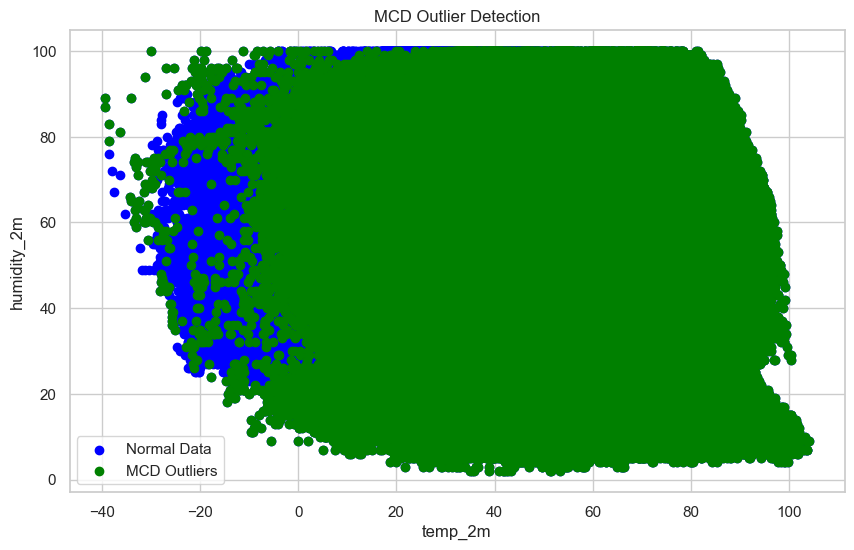

In [44]:
# Visualization

# Plot for Mahalanobis
plt.figure(figsize=(10, 6))
plt.scatter(df_numeric.iloc[:, 0], df_numeric.iloc[:, 1], c='blue', label='Normal Data')
plt.scatter(df_numeric.iloc[outliers_mahalanobis, 0], df_numeric.iloc[outliers_mahalanobis, 1], c='red', label='Mahalanobis Outliers')
plt.title('Mahalanobis Distance Outlier Detection')
plt.xlabel(df_numeric.columns[0])
plt.ylabel(df_numeric.columns[1])
plt.legend()
plt.show()

# Plot for MCD
plt.figure(figsize=(10, 6))
plt.scatter(df_numeric.iloc[:, 0], df_numeric.iloc[:, 1], c='blue', label='Normal Data')
plt.scatter(df_numeric.iloc[outliers_mcd, 0], df_numeric.iloc[outliers_mcd, 1], c='green', label='MCD Outliers')
plt.title('MCD Outlier Detection')
plt.xlabel(df_numeric.columns[0])
plt.ylabel(df_numeric.columns[1])
plt.legend()
plt.show()






# Seasonality, trends and Residual

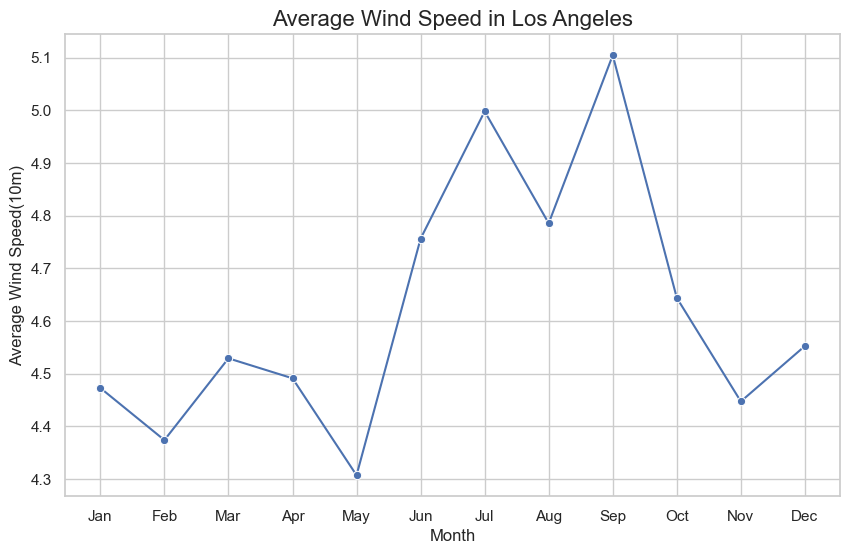

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already loaded your dataset into df and mapped city names
# 'time' column is in datetime format, and 'location_city' is mapped

# Step 1: Convert 'time' column to datetime if not done already
df['time'] = pd.to_datetime(df['time'])

# Step 2: Extract the month from the 'time' column
df['month'] = df['time'].dt.month

# Step 3: Filter for a specific city (e.g., 'New York City')
city_name = 'Los Angeles'  # You can change this to any city in your data
city_data = df[df['location_city'] == city_name]

# Step 4: Group data by month and calculate the average temperature for each month
monthly_avg_temp = city_data.groupby('month')['wind_speed_10m'].mean().reset_index()

# Step 5: Plot the temperature by month
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_avg_temp, x='month', y='wind_speed_10m', marker='o')

# Adding labels and title
plt.title(f'Average Wind Speed in {city_name}', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Wind Speed(10m)', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])

plt.grid(True)
plt.show()


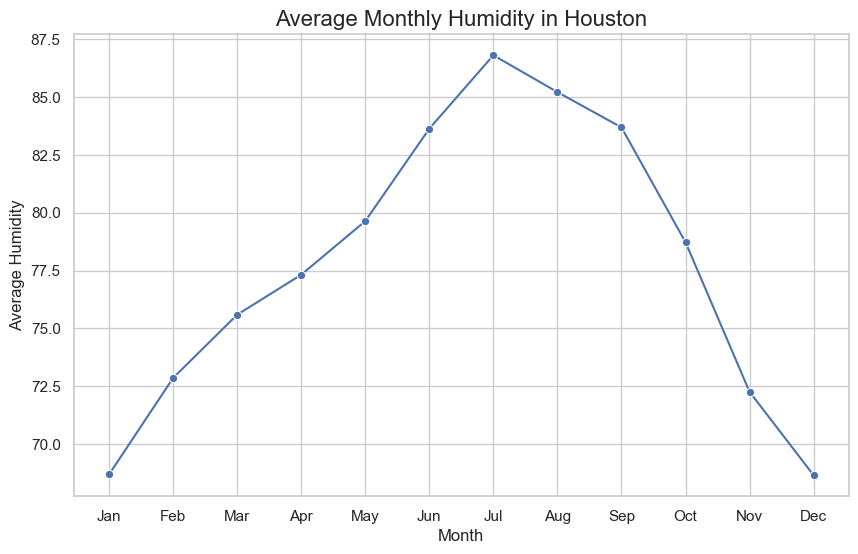

In [57]:
city_name = 'Houston'  # You can change this to any city in your data
city_data = df[df['location_city'] == city_name]

# Step 4: Group data by month and calculate the average temperature for each month
monthly_avg_temp = city_data.groupby('month')['humidity_2m'].mean().reset_index()

# Step 5: Plot the temperature by month
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_avg_temp, x='month', y='humidity_2m', marker='o')

# Adding labels and title
plt.title(f'Average Monthly Humidity in {city_name}', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Humidity', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])

plt.grid(True)
plt.show()

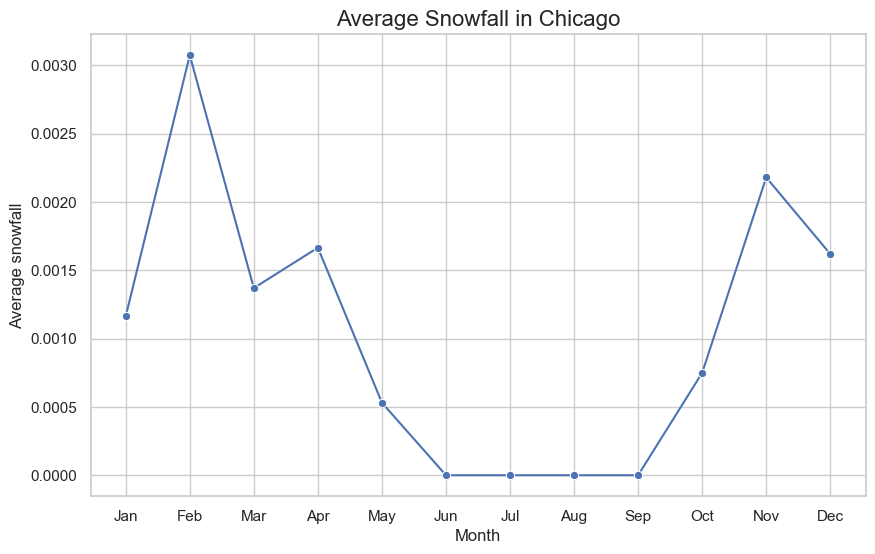

In [70]:
city_name = 'Chicago'  # You can change this to any city in your data
city_data = df[df['location_city'] == city_name]

# Step 4: Group data by month and calculate the average temperature for each month
monthly_avg_temp = city_data.groupby('month')['snowfall'].mean().reset_index()

# Step 5: Plot the temperature by month
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_avg_temp, x='month', y='snowfall', marker='o')

# Adding labels and title
plt.title(f'Average Snowfall in {city_name}', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average snowfall', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])

plt.grid(True)
plt.show()

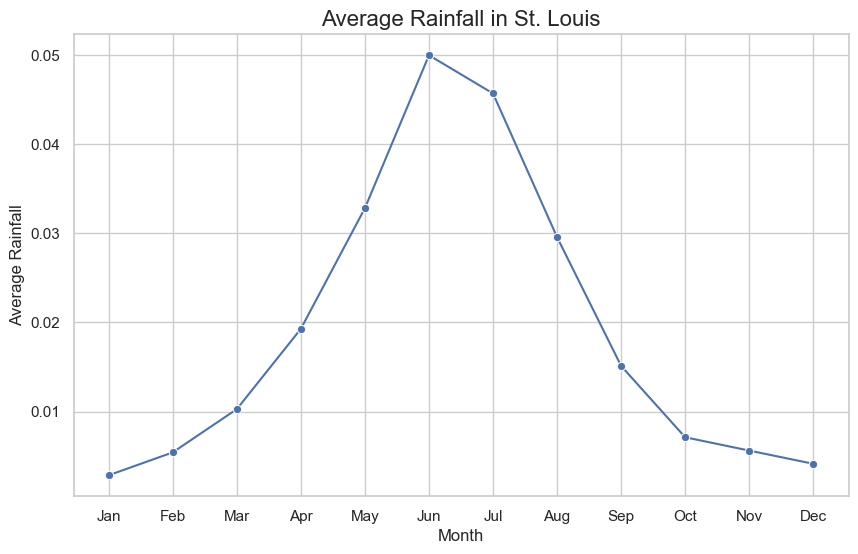

In [72]:
city_name = 'St. Louis'  # You can change this to any city in your data
city_data = df[df['location_city'] == city_name]

# Step 4: Group data by month and calculate the average temperature for each month
monthly_avg_temp = city_data.groupby('month')['precip'].mean().reset_index()

# Step 5: Plot the temperature by month
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_avg_temp, x='month', y='precip', marker='o')

# Adding labels and title
plt.title(f'Average Rainfall in {city_name}', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Rainfall', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])

plt.grid(True)
plt.show()

<Figure size 1200x800 with 0 Axes>

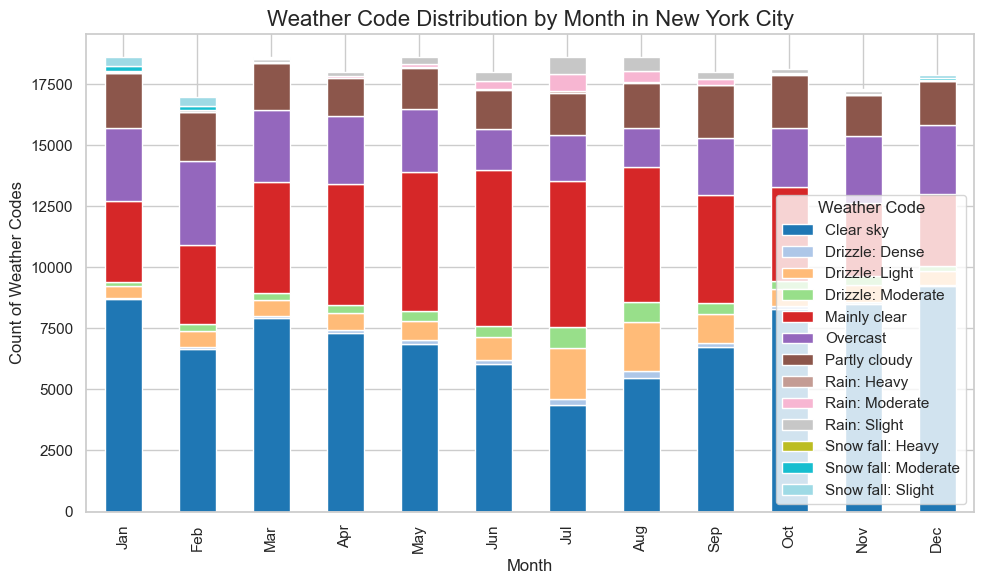

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already loaded your dataset into df and mapped city names

# Step 1: Convert 'time' column to datetime if not done already
df['time'] = pd.to_datetime(df['time'])

# Step 2: Extract the month from the 'time' column
df['month'] = df['time'].dt.month

# Step 3: Filter for 'New York City'
city_name = 'New York City'
city_data = df[df['location_city'] == city_name]

# Step 4: Group data by month and weather code (if the weather code is numeric or categorical)
monthly_weather_code = city_data.groupby('month')['weather_code'].value_counts().unstack().fillna(0)

# Step 5: Plot the weather code by month
plt.figure(figsize=(12, 8))
monthly_weather_code.plot(kind='bar', stacked=True, colormap='tab20', figsize=(10, 6))

# Adding labels and title
plt.title(f'Weather Code Distribution by Month in {city_name}', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count of Weather Codes', fontsize=12)
plt.xticks(ticks=range(12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])

plt.legend(title='Weather Code')
plt.grid(True)
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

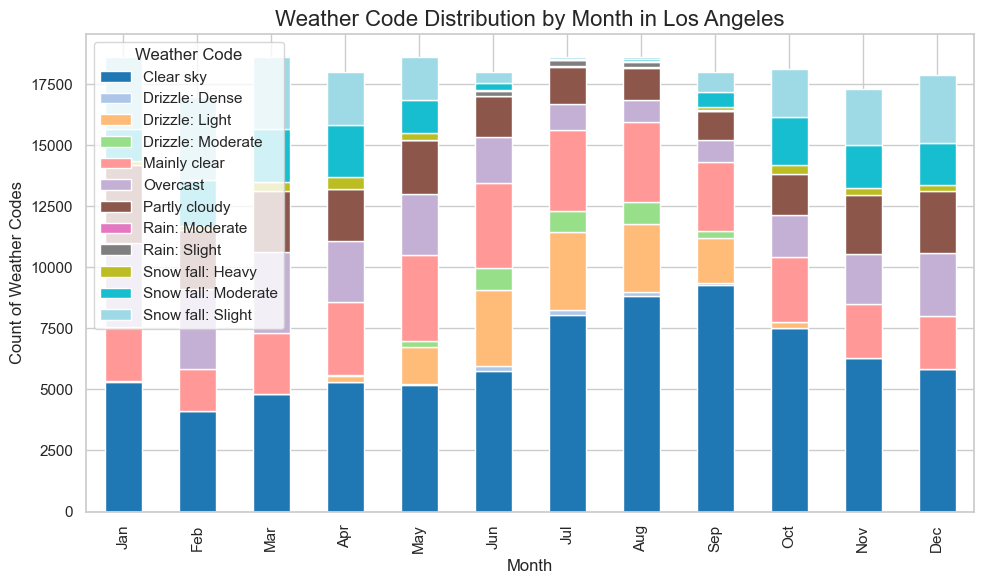

In [64]:
city_name = 'Los Angeles'
city_data = df[df['location_city'] == city_name]

# Step 4: Group data by month and weather code (if the weather code is numeric or categorical)
monthly_weather_code = city_data.groupby('month')['weather_code'].value_counts().unstack().fillna(0)

# Step 5: Plot the weather code by month
plt.figure(figsize=(12, 8))
monthly_weather_code.plot(kind='bar', stacked=True, colormap='tab20', figsize=(10, 6))

# Adding labels and title
plt.title(f'Weather Code Distribution by Month in {city_name}', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count of Weather Codes', fontsize=12)
plt.xticks(ticks=range(12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])

plt.legend(title='Weather Code')
plt.grid(True)
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

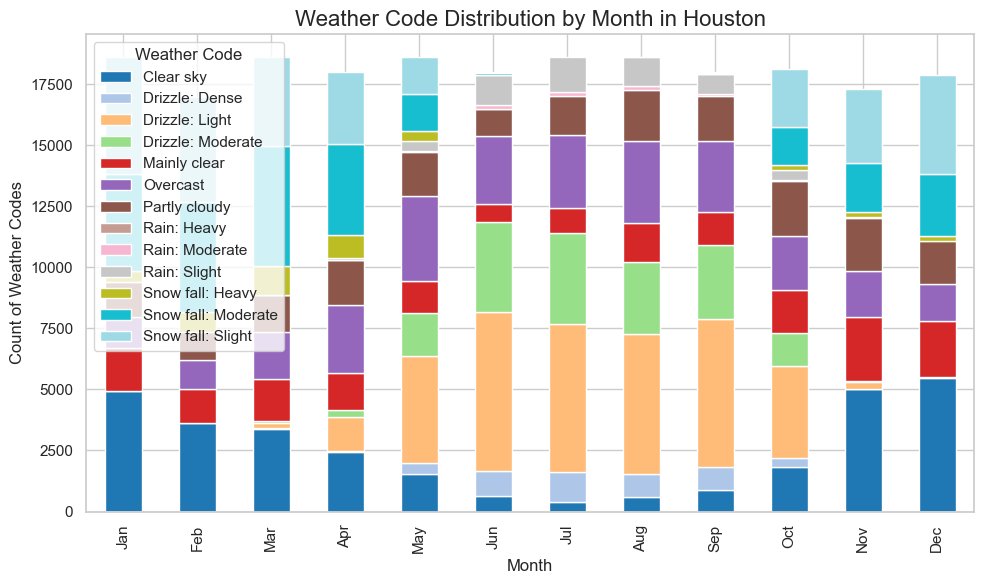

In [65]:
city_name = 'Houston'
city_data = df[df['location_city'] == city_name]

# Step 4: Group data by month and weather code (if the weather code is numeric or categorical)
monthly_weather_code = city_data.groupby('month')['weather_code'].value_counts().unstack().fillna(0)

# Step 5: Plot the weather code by month
plt.figure(figsize=(12, 8))
monthly_weather_code.plot(kind='bar', stacked=True, colormap='tab20', figsize=(10, 6))

# Adding labels and title
plt.title(f'Weather Code Distribution by Month in {city_name}', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count of Weather Codes', fontsize=12)
plt.xticks(ticks=range(12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])

plt.legend(title='Weather Code')
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

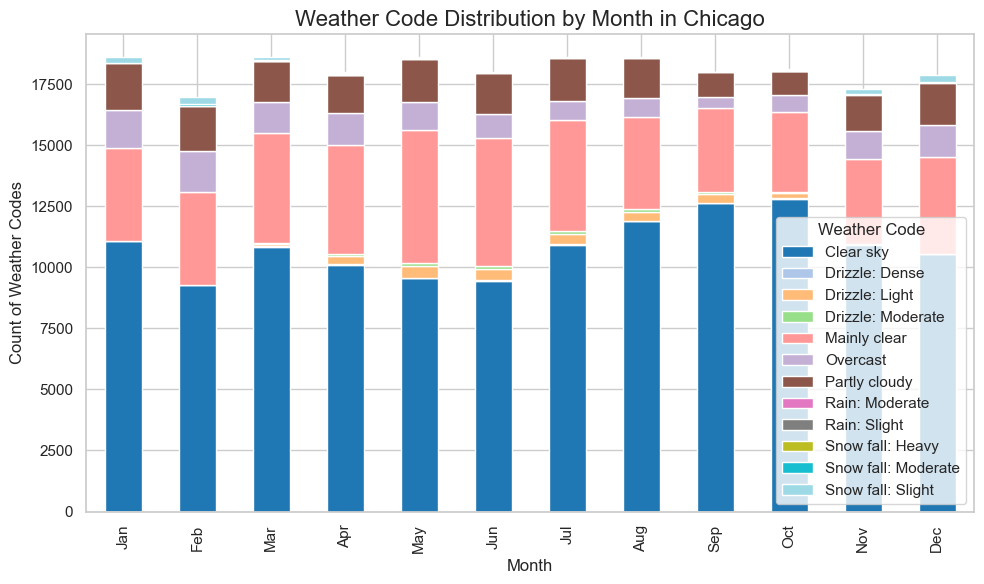

In [66]:
city_name = 'Chicago'
city_data = df[df['location_city'] == city_name]

# Step 4: Group data by month and weather code (if the weather code is numeric or categorical)
monthly_weather_code = city_data.groupby('month')['weather_code'].value_counts().unstack().fillna(0)

# Step 5: Plot the weather code by month
plt.figure(figsize=(12, 8))
monthly_weather_code.plot(kind='bar', stacked=True, colormap='tab20', figsize=(10, 6))

# Adding labels and title
plt.title(f'Weather Code Distribution by Month in {city_name}', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count of Weather Codes', fontsize=12)
plt.xticks(ticks=range(12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])

plt.legend(title='Weather Code')
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

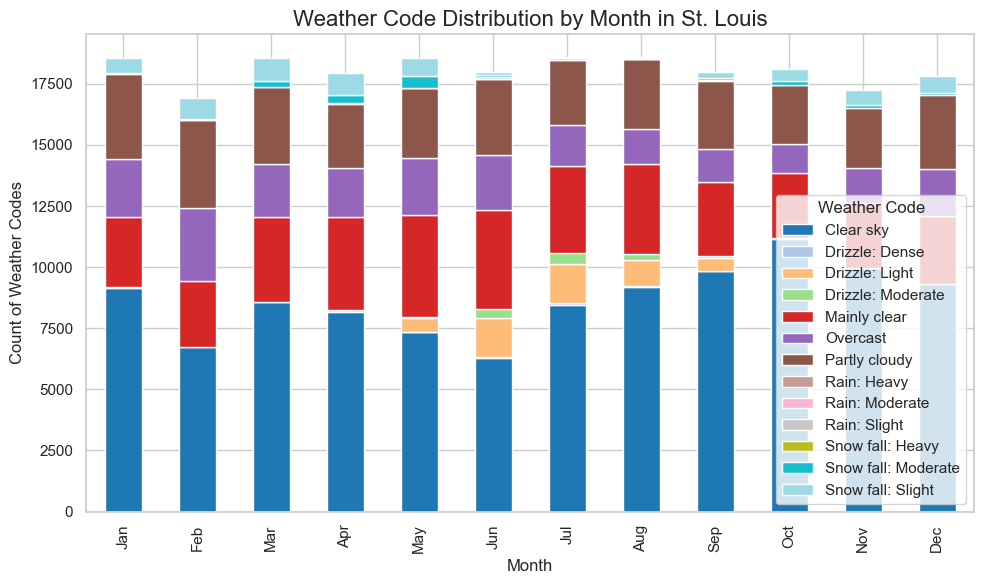

In [68]:
city_name = 'St. Louis'
city_data = df[df['location_city'] == city_name]

# Step 4: Group data by month and weather code (if the weather code is numeric or categorical)
monthly_weather_code = city_data.groupby('month')['weather_code'].value_counts().unstack().fillna(0)

# Step 5: Plot the weather code by month
plt.figure(figsize=(12, 8))
monthly_weather_code.plot(kind='bar', stacked=True, colormap='tab20', figsize=(10, 6))

# Adding labels and title
plt.title(f'Weather Code Distribution by Month in {city_name}', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count of Weather Codes', fontsize=12)
plt.xticks(ticks=range(12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])

plt.legend(title='Weather Code')
plt.grid(True)
plt.tight_layout()
plt.show()